In [1]:
# load data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### importe bralibase file to a data frame 



In [2]:
# read Bralibase input that contains several runs of one parameter that was alternated
def read_file_to_df(infile):
    
    #flags:
    set_paramerter = 0
    read_file = 0
    set_header = 0

    pen_parameter = ''
    df_dict ={}


    f = open(infile, 'r') # open the file for reading
    data = []
    for row_num, line in enumerate(f):
        # Remove the new line at the end and then split the string based on
        # tabs. This creates a python list of the values.
        values = line.strip().split('\t')
        # print values

        if values[0] == 'Testing the following parameters:':
            set_paramerter = 1
            continue
        elif set_paramerter == 1:
            # get second part of string e.g. 'pen 0,'
            pen_parameter = values[0].split(' ')[1]
            #print 'found parameter:'
            #print pen_parameter
            pen_parameter = pen_parameter.rstrip(',')
            set_paramerter = 0
            continue
        elif values[0] == '### Begin Objective Function ###':
            read_file = 1
            set_header = 1
            #print 'header'
            continue
        elif read_file ==1:
            if values[0] == '### End Objective Function ###':

                d = dict([(x[0],x[1]) for x in h])
                df = 'df_pen_' + str(pen_parameter)
                df_dict[df] = pd.DataFrame(data=d)
                #df_dict[df].info()
                read_file = 0
                continue
            elif set_header == 1:
                h = []
                h = list([(key, []) for key in values])
                #print values
                set_header = 0
            else:
                #print values
                for pos, i in enumerate(values):
                    h[pos][1].append(i)



    f.close() # close the file
    
    return df_dict

In [3]:
# change strings to flote or interger values and add the structure weight as colum
def cast_datatyps_of_df(df, pen_range_list):

    for i in pen_range_list:
        df_name = 'df_pen_' + str(i)
        df[df_name]['PredlocalEndA'] = df[df_name]['PredlocalEndA'].astype(int)
        df[df_name]['PredlocalEndB'] = df[df_name]['PredlocalEndB'].astype(int)
        df[df_name]['PredlocalStartA'] = df[df_name]['PredlocalStartA'].astype(int)
        df[df_name]['PredlocalStartB'] = df[df_name]['PredlocalStartB'].astype(int)
        df[df_name]['sps'] = df[df_name]['sps'].astype(float)
        df[df_name]['spsmax'] = df[df_name]['spsmax'].astype(float)
        df[df_name]['apsi'] = df[df_name]['apsi'].astype(int)
        df[df_name]['sci'] = df[df_name]['sci'].astype(int)
        df[df_name]['score'] = df[df_name]['score'].astype(int)
        df[df_name]['SeqAFp'] = df[df_name]['SeqAFp'].astype(float)
        df[df_name]['SeqATn'] = df[df_name]['SeqATn'].astype(float)
        df[df_name]['SeqATp'] = df[df_name]['SeqATp'].astype(float)
        df[df_name]['SeqAFn'] = df[df_name]['SeqAFn'].astype(float)
        df[df_name]['SeqBFp'] = df[df_name]['SeqBFp'].astype(float)
        df[df_name]['SeqBTn'] = df[df_name]['SeqBTn'].astype(float)
        df[df_name]['SeqBTp'] = df[df_name]['SeqBTp'].astype(float)
        df[df_name]['SeqBFn'] = df[df_name]['SeqBFn'].astype(float)
        df[df_name]['ReflocalEndA'] = df[df_name]['ReflocalEndA'].astype(int)
        df[df_name]['ReflocalEndB'] = df[df_name]['ReflocalEndB'].astype(int)
        df[df_name]['ReflocalStartA'] = df[df_name]['ReflocalStartA'].astype(int)
        df[df_name]['ReflocalStartB'] = df[df_name]['ReflocalStartB'].astype(int)
        df[df_name]['RefsequenceLengthRawA'] = df[df_name]['RefsequenceLengthRawA'].astype(int)
        df[df_name]['RefsequenceLengthRawB'] = df[df_name]['RefsequenceLengthRawB'].astype(int)
        df[df_name]['RefsequenceLengthRefA'] = df[df_name]['RefsequenceLengthRefA'].astype(int)
        df[df_name]['RefsequenceLengthRefB'] = df[df_name]['RefsequenceLengthRefB'].astype(int)
        df[df_name]['pen_range'] = i

    return df

In [4]:
# concatinate dataframes for the different sw (for the average and the compleat data)
def concatinate_dfs(pen_range_list, df_dict):
    scores = []
    max_sps = []
    df_names_list = []
    # construct y
    for i in pen_range_list:
        df_name = 'df_pen_' + str(i)
        df_names_list.append(df_dict[df_name])
        df = df_dict[df_name]
        df_score = df[['score']].apply(pd.to_numeric)
        #print df_score
        #print df_score['score'].mean()
        scores.append(int(df_score['score'].mean()))
        df_max_sps = df[['spsmax']].apply(pd.to_numeric)
        max_sps.append(df_max_sps['spsmax'].mean())

    # see each datatyp of a list
    #for element in scores:
        #print element, type(element)     


    np_pen_range = np.array(pen_range_list)    
    np_scores = np.array(scores)
    np_max_sps = np.array(max_sps)



    d = {'pen_range': pen_range_list, 'scores': scores, 'max_sps': max_sps}
    df_avg_scors = pd.DataFrame(data=d)


    df_full_pen_scores = pd.concat(df_names_list)
    #df_full_sw_scores.info()
    
    return df_full_pen_scores, df_avg_scors

In [5]:
# concatinate a colum of the df and the belonging df sw name
def concatinate_dfs_making_sw_colums(pen_range_list, df_dict, column='score'):
    
    df_colum_pen_name = pd.DataFrame()
    
    # construct y
    for i in pen_range_list:
        df_name = 'df_pen_' + str(i)
        column_name = 'pen_' + str(i)
        #print column_name
        df = df_dict[df_name]
        df_colum_pen_name[column_name] = df[column]
        
    
    return df_colum_pen_name

In [6]:
def select_parts_of_df(df_in, identifier):
    df = pd.concat([df_in['Filename'], df_in['pen_range'], df_in['score'], df_in['PredlocalStartA'], df_in['PredlocalEndA'], df_in['PredlocalStartB'], df_in['PredlocalEndB'], df_in['spsmax'],  df_in['sps'], df_in['sens'], df_in['spec'], df_in['geo_mean'], df_in['mean'], df_in['sci'], df_in['F1']], axis=1, keys=['Filename', 'pen_range', 'score', 'PredlocalStartA', 'PredlocalEndA', 'PredlocalStartB', 'PredlocalEndB', 'spsmax', 'sps', 'sens', 'spec', 'geo_mean', 'mean', 'sci', 'F1'])
    df['seq'] = identifier
    return df



def generate_one_df(df_full_sw_scores, df_full_sw_scores_shuffled_seq, id_all_shuffeld='shuffled_RNA', id_con_shuffle='unshuffled_RNA'):
    
    df_allseq_unshuffled = select_parts_of_df(df_full_sw_scores, id_con_shuffle)
    df_allseq_shuffled = select_parts_of_df(df_full_sw_scores_shuffled_seq, id_all_shuffeld)
    
    frames = [df_allseq_shuffled, df_allseq_unshuffled]
    df_shuffled_and_unshuffled = pd.concat(frames)
    
    return df_shuffled_and_unshuffled

In [7]:
def create_statisics_df(df_dict, pen_list=[0,50,100,150,200,250,300], sens_spec_sep=True):
    df_plot_sens = pd.DataFrame()
    df_plot_spec = pd.DataFrame()
    df_list = []
    
    for pen in pen_list:
        df_dict_temp =df_dict.loc[df_dict['pen_range'] == pen]
        #df_dict_temp.info()
        df_statisics = df_dict_temp[['SeqATp', 'SeqBTp', 'SeqATn', 'SeqBTn', 'SeqAFp', 'SeqBFp', 'SeqAFn', 'SeqBFn', 'RefsequenceLengthRawA']]
        sens = 'sensitivity_sw_' + str(sw)
        spec = 'specificity_sw_' + str(sw)
        df_plot_sens[sens]= ((df_statisics['SeqATp']/ (df_statisics['SeqATp'] + df_statisics['SeqAFn'])) +(df_statisics['SeqBTp']/ (df_statisics['SeqBTp'] + df_statisics['SeqBFn']))) / 2
        df_plot_spec[spec]= ((df_statisics['SeqATn']/ (df_statisics['SeqATn'] + df_statisics['SeqAFp'])) +(df_statisics['SeqBTn']/ (df_statisics['SeqBTn'] + df_statisics['SeqBFp']))) / 2
        
    return df_plot_sens, df_plot_spec  




In [8]:
# bis zum concat kann man alles zusammen fassen! inklusice ob df in bestimmten range sein soll! 
def generate_dataset(file_name, step_size = 5, start_param = 0, end_param = 20, cut_apsi=100, cut_sci=200):
    #read file
    df_dict = read_file_to_df(file_name)
    
    #df_dict.info()
    
    # list for different sw datasets 
    end_param = end_param + step_size
    pen_range_list = list(range(start_param,end_param,step_size))
    #print pen_range_list
    
    # cast parameters of df
    df_dict = cast_datatyps_of_df(df_dict, pen_range_list)
    
    # concatinate dataframe
    df_full_sw_scores, df_avg_scors = concatinate_dfs(pen_range_list, df_dict)
    
    
    
    df_full_sw_scores['sens_a']= df_full_sw_scores['SeqATp']/ (df_full_sw_scores['SeqATp'] + df_full_sw_scores['SeqAFn']) 
    df_full_sw_scores['sens_b']= df_full_sw_scores['SeqBTp']/ (df_full_sw_scores['SeqBTp'] + df_full_sw_scores['SeqBFn'])
    df_full_sw_scores['spec_a']= df_full_sw_scores['SeqATn']/ (df_full_sw_scores['SeqATn'] + df_full_sw_scores['SeqAFp'])
    df_full_sw_scores['spec_b']= df_full_sw_scores['SeqBTn']/ (df_full_sw_scores['SeqBTn'] + df_full_sw_scores['SeqBFp'])
    df_full_sw_scores['ppv_a']= df_full_sw_scores['SeqATp']/ (df_full_sw_scores['SeqATp'] + df_full_sw_scores['SeqAFp'])
    df_full_sw_scores['ppv_b']= df_full_sw_scores['SeqBTp']/ (df_full_sw_scores['SeqBTp'] + df_full_sw_scores['SeqBFp'])

    df_full_sw_scores.isnull().ppv_a.any()
    
    #df_full_sw_scores['sens']= ((df_full_sw_scores['SeqATp']/ (df_full_sw_scores['SeqATp'] + df_full_sw_scores['SeqAFn'])) +(df_full_sw_scores['SeqBTp']/ (df_full_sw_scores['SeqBTp'] + df_full_sw_scores['SeqBFn']))) / 2
    #df_full_sw_scores['spec']= ((df_full_sw_scores['SeqATn']/ (df_full_sw_scores['SeqATn'] + df_full_sw_scores['SeqAFp'])) +(df_full_sw_scores['SeqBTn']/ (df_full_sw_scores['SeqBTn'] + df_full_sw_scores['SeqBFp']))) / 2
    
    df_full_sw_scores['sens']= (df_full_sw_scores['sens_a'] + df_full_sw_scores['sens_b']) /2
    df_full_sw_scores['spec']= (df_full_sw_scores['spec_a'] + df_full_sw_scores['spec_b']) /2   
    df_full_sw_scores['ppv']= (df_full_sw_scores['ppv_a'] + df_full_sw_scores['ppv_b']) /2 
    
    df_full_sw_scores['geo_mean_a']= np.sqrt((df_full_sw_scores['sens_a']) * (df_full_sw_scores['spec_a']))
    df_full_sw_scores['geo_mean_b']= np.sqrt((df_full_sw_scores['sens_b']) * (df_full_sw_scores['spec_b']))
    df_full_sw_scores['geo_mean']= ((df_full_sw_scores['geo_mean_a']) + (df_full_sw_scores['geo_mean_b']))/2

    df_full_sw_scores['mean']= ((df_full_sw_scores['sens_a'] + df_full_sw_scores['sens_b']) + (df_full_sw_scores['spec_a'] + df_full_sw_scores['spec_b']))/4
    df_full_sw_scores['F1_a']= (2/ ((1/df_full_sw_scores['sens_a']) + (1/df_full_sw_scores['ppv_a'])))
    df_full_sw_scores['F1_b']= (2/ ((1/df_full_sw_scores['sens_b']) + (1/df_full_sw_scores['ppv_b'])))
    df_full_sw_scores['F1']= (df_full_sw_scores['F1_a'] + df_full_sw_scores['F1_b'])/2

    df_full_sw_scores['sum_in_seq_length'] = df_full_sw_scores['RefsequenceLengthRawA'] + df_full_sw_scores['RefsequenceLengthRawB']
    df_full_sw_scores['avg_in_seq_length'] = (df_full_sw_scores['RefsequenceLengthRawA'] + df_full_sw_scores['RefsequenceLengthRawB'])/2
    df_full_sw_scores['avg_alig_length'] = ((df_full_sw_scores['PredlocalEndA'] - df_full_sw_scores['PredlocalStartA']+1) + (df_full_sw_scores['PredlocalEndB'] - df_full_sw_scores['PredlocalStartB']+1)) / 2
    df_full_sw_scores['sum_alig_length'] = ((df_full_sw_scores['PredlocalEndA'] - df_full_sw_scores['PredlocalStartA']+1) + (df_full_sw_scores['PredlocalEndB'] - df_full_sw_scores['PredlocalStartB']+1)) 

    
    if (cut_apsi < 100):
        print '< ' + str(cut_apsi)
        df_full_sw_scores = df_full_sw_scores[(df_full_sw_scores.apsi < cut_apsi)]
        
    if (cut_sci < 200):
        print '> ' + str(cut_sci)
        df_full_sw_scores = df_full_sw_scores[(df_full_sw_scores.sci > cut_sci)]    
    
    #return df_full_sw_scores, df_avg_scors
    return df_full_sw_scores, df_avg_scors



### Read data

In [9]:
# verion 2.RC6
plot_dir_paper = '/home/muellert/Dokumente/locarna_parameteropt/plots/20181031_plots_for_paper/'
plot_dir = '/home/muellert/Dokumente/locarna_parameteropt/plots/20180822_local_aling_penalty_comparision/'
file_dir = '/home/muellert/Dokumente/locarna_parameteropt/Data/20180703_local_con100_penaltys/'
infile_local_full_pen_sw100 = file_dir + '20180702_local_shuffled_only_con100_Bralibese_version2_6_pen_0_20_SW_100.log'
infile_local_full_pen_sw200 = file_dir +'20180702_local_shuffled_only_con100_Bralibese_version2_6_pen_0_20_SW_200.log'

infile_local_full_opt_parmam_sw200 = '/home/muellert/Dokumente/locarna_parameteropt/Data/20180820_optimized_param_local/20180810_local_Bralibase_pen_optimized_param_sw200.log'


In [10]:
# define dataset

cut_apsi_value = 100;

if cut_apsi_value < 100:
    plot_title = 'local BraliBase filterd APSI < ' + str(cut_apsi_value)
elif cut_apsi_value == 100:
    plot_title = 'Full local BraliBase' 
else:
    print 'error: apsi sould be between 20 to 100'

### call function to construct df

In [11]:
# get single datasets

# full
df_local_full_pen_scores_sw100, df_local_avg_scorssw100 = generate_dataset(infile_local_full_pen_sw100, cut_apsi=cut_apsi_value)
df_local_full_pen_scores_sw200, df_local_avg_scorssw200 = generate_dataset(infile_local_full_pen_sw200, cut_apsi=cut_apsi_value)
df_local_full_pen_scores_sw200_opt, df_local_avg_scorssw200_opt = generate_dataset(infile_local_full_opt_parmam_sw200, cut_apsi=cut_apsi_value)


# APSI < 70
df_local_full_pen_scores_sw100_SI70, df_local_avg_scorssw100_SI70 = generate_dataset(infile_local_full_pen_sw100, cut_apsi=70)
df_local_full_pen_scores_sw200_SI70, df_local_avg_scorssw200_SI70 = generate_dataset(infile_local_full_pen_sw200, cut_apsi=70)
df_local_full_pen_scores_sw200_opt_SI70, df_local_avg_scorssw200_opt_SI70 = generate_dataset(infile_local_full_opt_parmam_sw200, cut_apsi=70)


# APSI < 70 + SCI > 100
df_local_full_pen_scores_sw100_SI70_SCI100, df_local_avg_scorssw100_SI70_SCI100 = generate_dataset(infile_local_full_pen_sw100, cut_apsi=70, cut_sci=100)
df_local_full_pen_scores_sw200_SI70_SCI100, df_local_avg_scorssw200_SI70_SCI100 = generate_dataset(infile_local_full_pen_sw200, cut_apsi=70, cut_sci=100)


< 70
< 70
< 70
< 70
> 100
< 70
> 100


In [12]:
# Test upper and lover bound of sci
print df_local_full_pen_scores_sw200.sci.max()
print df_local_full_pen_scores_sw200.sci.min()
# 175
#  66

175
66


In [13]:
# add df together
## connect sw100 and sw200 
# full 
df_pen_range_sw100_sw200 = generate_one_df(df_local_full_pen_scores_sw200, df_local_full_pen_scores_sw100, id_all_shuffeld='sw100', id_con_shuffle='sw200')

# APSI < 70
df_pen_range_sw100_sw200_SI70 = generate_one_df(df_local_full_pen_scores_sw200_SI70, df_local_full_pen_scores_sw100_SI70, id_all_shuffeld='sw100', id_con_shuffle='sw200')

# APSI < 70 + SCI > 100
df_pen_range_sw100_sw200_SI70_SCI100 = generate_one_df(df_local_full_pen_scores_sw200_SI70_SCI100, df_local_full_pen_scores_sw100_SI70_SCI100, id_all_shuffeld='sw100', id_con_shuffle='sw200')

## connect sw200 def param and sw200 opt param filterd
# full 
df_pen_range_sw200_def_sw200_opt = generate_one_df(df_local_full_pen_scores_sw200, df_local_full_pen_scores_sw200_opt, id_all_shuffeld='sw200_opt_param', id_con_shuffle='sw200_def_param')

# APSI < 70
df_pen_range_sw200_def_sw200_opt_SI70 = generate_one_df(df_local_full_pen_scores_sw200_SI70, df_local_full_pen_scores_sw200_opt_SI70, id_all_shuffeld='sw200_opt_param', id_con_shuffle='sw200_def_param')


In [14]:
# calculate alignemnt lenth

#df_shuffled_and_unshuffled['ReflocalStartB']
df_pen_range_sw100_sw200['alig_length'] = ((df_pen_range_sw100_sw200['PredlocalEndA'] - df_pen_range_sw100_sw200['PredlocalStartA']+1) + (df_pen_range_sw100_sw200['PredlocalEndB'] - df_pen_range_sw100_sw200['PredlocalStartB']+1)) / 2
df_pen_range_sw100_sw200_SI70['alig_length'] = ((df_pen_range_sw100_sw200_SI70['PredlocalEndA'] - df_pen_range_sw100_sw200_SI70['PredlocalStartA']+1) + (df_pen_range_sw100_sw200_SI70['PredlocalEndB'] - df_pen_range_sw100_sw200_SI70['PredlocalStartB']+1)) / 2

df_pen_range_sw100_sw200.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62260 entries, 0 to 6225
Data columns (total 17 columns):
Filename           62260 non-null object
pen_range          62260 non-null int64
score              62260 non-null int64
PredlocalStartA    62260 non-null int64
PredlocalEndA      62260 non-null int64
PredlocalStartB    62260 non-null int64
PredlocalEndB      62260 non-null int64
spsmax             62260 non-null float64
sps                62260 non-null float64
sens               62260 non-null float64
spec               62260 non-null float64
geo_mean           62260 non-null float64
mean               62260 non-null float64
sci                62260 non-null int64
F1                 62260 non-null float64
seq                62260 non-null object
alig_length        62260 non-null float64
dtypes: float64(8), int64(7), object(2)
memory usage: 8.6+ MB


In [15]:
df_pen_range_sw100_sw200_sci_higher100 = df_pen_range_sw100_sw200[(df_pen_range_sw100_sw200.sci > 100)]
df_pen_range_sw100_sw200_sci_higher100.head()
df_pen_range_sw100_sw200

,Filename,pen_range,score,PredlocalStartA,PredlocalEndA,PredlocalStartB,PredlocalEndB,spsmax,sps,sens,spec,geo_mean,mean,sci,F1,seq,alig_length
0,/scratch/bi01/miladim/Teresa/Bralibase-LocalAl...,0,6918,99,152,99,152,0.962963,1.000000,1.000000,0.9900,0.994987,0.995000,99,0.981132,sw100,54.0
1,/scratch/bi01/miladim/Teresa/Bralibase-LocalAl...,0,17089,102,252,102,251,0.006494,0.006494,0.980456,1.0000,0.990180,0.990228,91,0.990131,sw100,150.5
2,/scratch/bi01/miladim/Teresa/Bralibase-LocalAl...,0,4862,100,164,100,164,0.892308,0.892308,1.000000,0.9950,0.997494,0.997500,97,0.992188,sw100,65.0
3,/scratch/bi01/miladim/Teresa/Bralibase-LocalAl...,0,3264,111,168,110,167,0.742857,0.742857,0.846760,1.0000,0.920190,0.923380,125,0.917010,sw100,58.0
4,/scratch/bi01/miladim/Teresa/Bralibase-LocalAl...,0,1657,102,117,149,164,0.000000,0.000000,0.000000,0.9200,0.000000,0.460000,108,0.000000,sw100,16.0
5,/scratch/bi01/miladim/Teresa/Bralibase-LocalAl...,0,24488,100,352,99,352,0.062992,0.062992,1.000000,0.9925,0.996242,0.996250,88,0.997034,sw100,253.5
6,/scratch/bi01/miladim/Teresa/Bralibase-LocalAl...,0,1514,13,48,39,74,0.000000,0.000000,0.000000,0.8200,0.000000,0.410000,130,0.000000,sw100,36.0
7,/scratch/bi01/miladim/Teresa/Bralibase-LocalAl...,0,3138,107,162,107,163,0.763889,0.763889,0.790200,1.0000,0.888931,0.895100,136,0.882805,sw100,56.5
8,/scratch/bi01/miladim/Teresa/Bralibase-LocalAl...,0,8456,101,214,101,214,0.991228,0.991228,0.991228,0.9950,0.993112,0.993114,67,0.991228,sw100,114.0
9,/scratch/bi01/miladim/Teresa/Bralibase-LocalAl...,0,5379,99,153,99,153,0.945455,1.000000,1.000000,0.9850,0.992472,0.992500,92,0.971963,sw100,55.0


Text(0,0.5,'maxSPS')

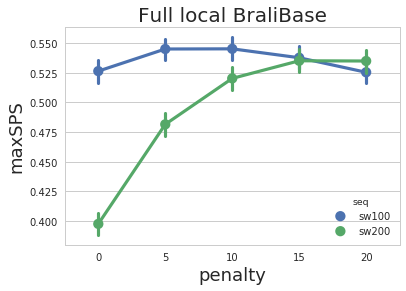

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
#sns.set_context("paper")
#fig = plt.figure(figsize=(6,5))
#ax = fig.gca()# define axis
fig, ax = plt.subplots()



sns.pointplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw200, ax=ax, alpha =1)



ax.set_title(plot_title, fontsize=20)
#ax.set_title('Full BraliBase', fontsize=20)
ax.set_xlabel('penalty', fontsize=18)
ax.set_ylabel('maxSPS', fontsize=18)


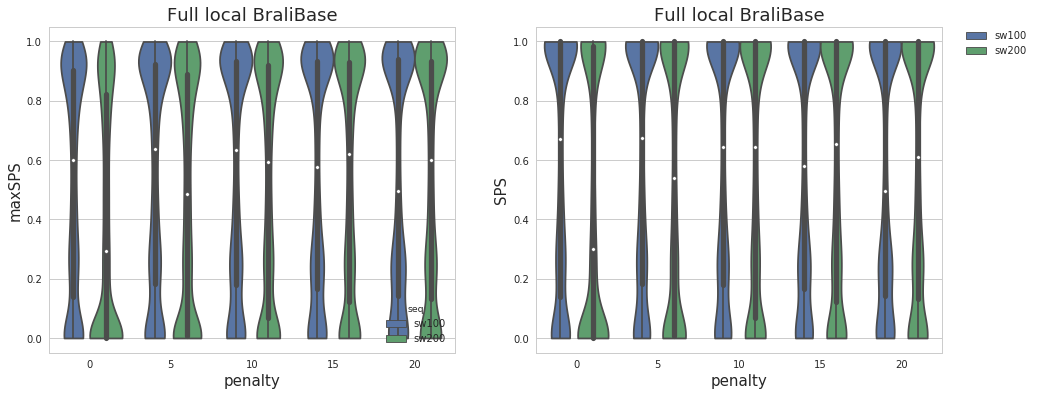

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

sns.violinplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw200, ax=ax1,cut=0)
ax1.set_title(plot_title, fontsize=18)
ax1.set_xlabel('penalty', fontsize=15)
ax1.set_ylabel('maxSPS', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

sns.violinplot(x="pen_range", y="sps", hue="seq", data=df_pen_range_sw100_sw200, ax=ax2,cut=0)
ax2.set_title(plot_title, fontsize=18)
ax2.set_xlabel('penalty', fontsize=15)
ax2.set_ylabel('SPS', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

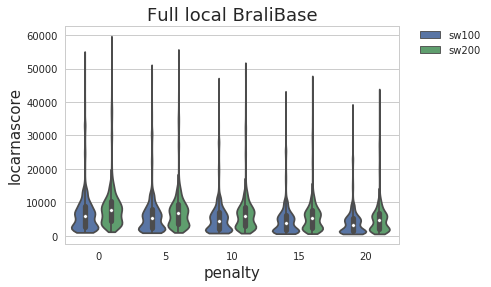

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

fig, ax = plt.subplots()

sns.violinplot(x="pen_range", y="score", hue="seq", data=df_pen_range_sw100_sw200, ax=ax,cut=0)
ax.set_title(plot_title, fontsize=18)
ax.set_xlabel('penalty', fontsize=15)
ax.set_ylabel('locarnascore', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

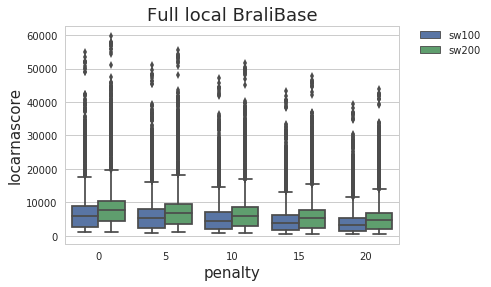

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, ax = plt.subplots()

sns.boxplot(x="pen_range", y="score", hue="seq", data=df_pen_range_sw100_sw200, ax=ax)
ax.set_title(plot_title, fontsize=18)
ax.set_xlabel('penalty', fontsize=15)
ax.set_ylabel('locarnascore', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

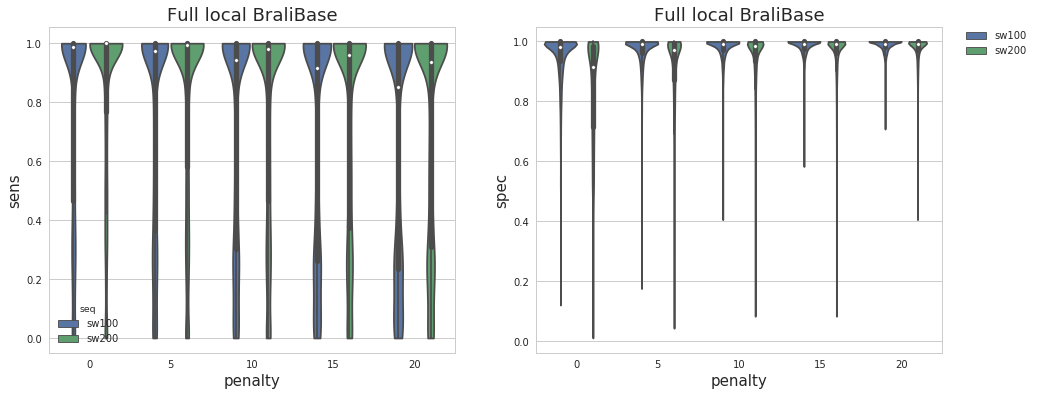

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

sns.violinplot(x="pen_range", y="sens", hue="seq", data=df_pen_range_sw100_sw200, ax=ax1,cut=0)
ax1.set_title(plot_title, fontsize=18)
ax1.set_xlabel('penalty', fontsize=15)
ax1.set_ylabel('sens', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

sns.violinplot(x="pen_range", y="spec", hue="seq", data=df_pen_range_sw100_sw200, ax=ax2,cut=0)
ax2.set_title(plot_title, fontsize=18)
ax2.set_xlabel('penalty', fontsize=15)
ax2.set_ylabel('spec', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.savefig('violinplot_sens_spec_penalties_locarnaV2.0RC6_local_two_plots_full_local_bralibase_con100.pdf', format='pdf')

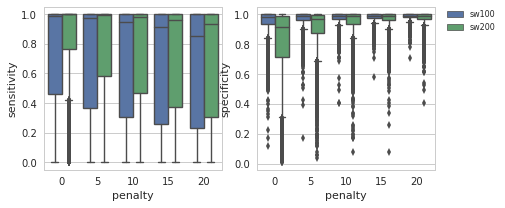

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(7,3))
sns.set_context("paper")



sns.boxplot(x="pen_range", y="sens", hue="seq", data=df_pen_range_sw100_sw200, ax=ax1)
#ax1.set_title(plot_title, fontsize=18)
ax1.set_xlabel('penalty')
ax1.set_ylabel('sensitivity')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.legend_.remove()


sns.boxplot(x="pen_range", y="spec", hue="seq", data=df_pen_range_sw100_sw200, ax=ax2)
#ax2.set_title(plot_title, fontsize=18)
ax2.set_xlabel('penalty')
ax2.set_ylabel('specificity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.savefig(plot_dir + 'boxplot_sens_spec_penalties_locarnaV2_0RC6_local_two_plots_full_local_bralibase_con100.pdf', format='pdf', bbox_inches='tight')

(0, 1)

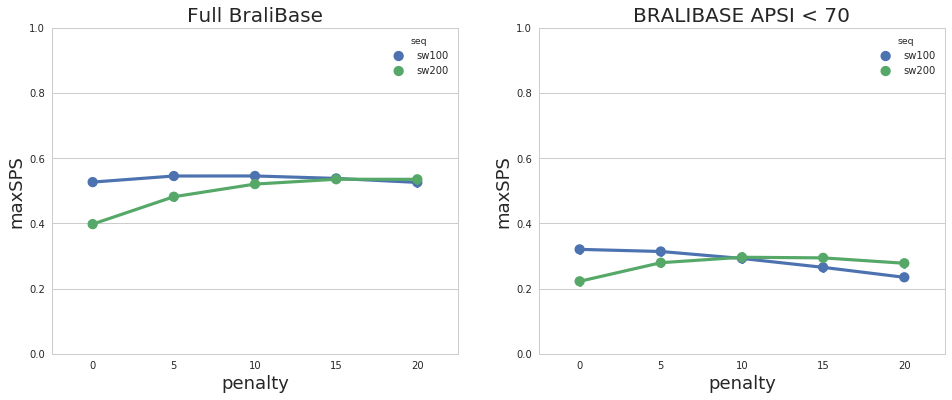

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
#sns.set_context("paper")
#fig = plt.figure(figsize=(6,5))
#ax = fig.gca()# define axis
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

sns.pointplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw200, ax=ax1, alpha =1)

ax1.set_title('Full BraliBase', fontsize=20)
ax1.set_xlabel('penalty', fontsize=18)
ax1.set_ylabel('maxSPS', fontsize=18)
ax1.set_ylim([0,1])

sns.pointplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw200_SI70, ax=ax2, alpha =1)

ax2.set_title('BRALIBASE APSI < 70', fontsize=20)
#ax.set_title('Full BraliBase', fontsize=20)
ax2.set_xlabel('penalty', fontsize=18)
ax2.set_ylabel('maxSPS', fontsize=18)
ax2.set_ylim([0,1])


In [23]:
df_sw200_pen0 = df_local_full_pen_scores_sw200.loc[(df_local_full_pen_scores_sw200.pen_range == 0)]
df_sw200_pen5 = df_local_full_pen_scores_sw200.loc[(df_local_full_pen_scores_sw200.pen_range == 5)]
df_sw200_pen10 = df_local_full_pen_scores_sw200.loc[(df_local_full_pen_scores_sw200.pen_range == 10)]
df_sw200_pen15 = df_local_full_pen_scores_sw200.loc[(df_local_full_pen_scores_sw200.pen_range == 15)]
df_sw200_pen20 = df_local_full_pen_scores_sw200.loc[(df_local_full_pen_scores_sw200.pen_range == 20)]


#df_sw200_pen5.info()


df_sw100_pen0 = df_local_full_pen_scores_sw100.loc[(df_local_full_pen_scores_sw100.pen_range == 0)]
df_sw100_pen5 = df_local_full_pen_scores_sw100.loc[(df_local_full_pen_scores_sw100.pen_range == 5)]
df_sw100_pen10 = df_local_full_pen_scores_sw100.loc[(df_local_full_pen_scores_sw100.pen_range == 10)]
df_sw100_pen15 = df_local_full_pen_scores_sw100.loc[(df_local_full_pen_scores_sw100.pen_range == 15)]
df_sw100_pen20 = df_local_full_pen_scores_sw100.loc[(df_local_full_pen_scores_sw100.pen_range == 20)]

/home/muellert/miniconda3/envs/ploting/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/muellert/miniconda3/envs/ploting/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/muellert/miniconda3/envs/ploting/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/muellert/miniconda3/envs/ploting/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is

(0, 4000)

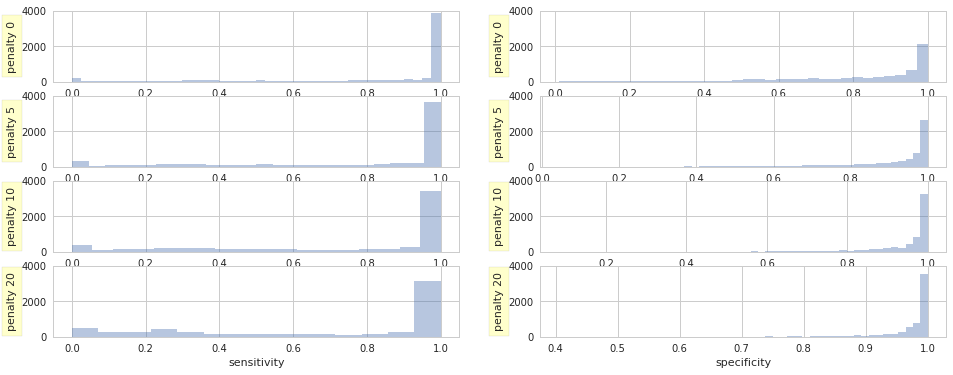

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16,6))
box = dict(facecolor='yellow', pad=5, alpha=0.2)

x = pd.Series(df_sw200_pen0['sens'], name="sensitivity")
ax = sns.distplot(x, ax=ax1, kde=False)
ax1.set_ylabel('penalty 0', bbox=box)
y = pd.Series(df_sw200_pen0['spec'], name="specificity")
ax = sns.distplot(y, ax=ax2, kde=False)
ax2.set_ylabel('penalty 0', bbox=box)

z = pd.Series(df_sw200_pen5['sens'], name="sensitivity")
ax = sns.distplot(z, ax=ax3, kde=False)
ax3.set_ylabel('penalty 5', bbox=box)
s = pd.Series(df_sw200_pen5['spec'], name="specificity")
ax = sns.distplot(s, ax=ax4, kde=False)
ax4.set_ylabel('penalty 5', bbox=box)

k = pd.Series(df_sw200_pen10['sens'], name="sensitivity")
ax = sns.distplot(k, ax=ax5, kde=False)
ax5.set_ylabel('penalty 10', bbox=box)
l = pd.Series(df_sw200_pen10['spec'], name="specificity")
ax = sns.distplot(l, ax=ax6, kde=False)
ax6.set_ylabel('penalty 10', bbox=box)

a = pd.Series(df_sw200_pen20['sens'], name="sensitivity")
ax = sns.distplot(a, ax=ax7, kde=False)
ax7.set_ylabel('penalty 20', bbox=box)
b = pd.Series(df_sw200_pen20['spec'], name="specificity")
ax = sns.distplot(b, ax=ax8, kde=False)
ax8.set_ylabel('penalty 20', bbox=box)

ax1.set_ylim([0,4000])
ax2.set_ylim([0,4000])
ax3.set_ylim([0,4000])
ax4.set_ylim([0,4000])
ax5.set_ylim([0,4000])
ax6.set_ylim([0,4000])
ax7.set_ylim([0,4000])
ax8.set_ylim([0,4000])




/home/muellert/miniconda3/envs/ploting/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/muellert/miniconda3/envs/ploting/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/muellert/miniconda3/envs/ploting/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/muellert/miniconda3/envs/ploting/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is

Text(0,0.5,'penalty 20')

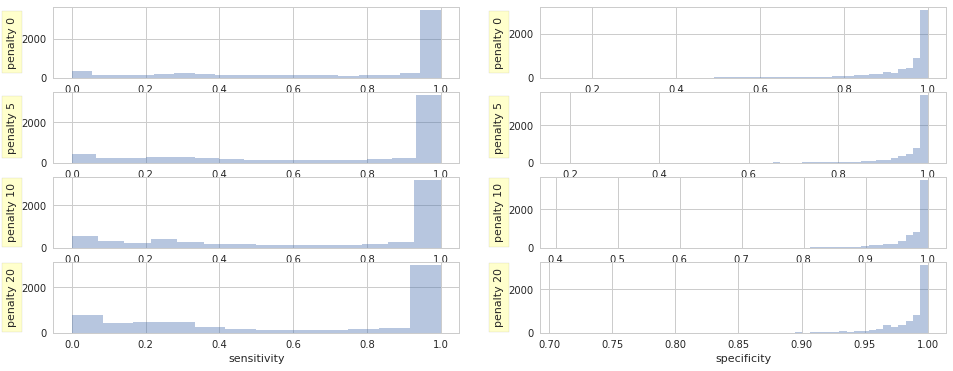

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16,6))
box = dict(facecolor='yellow', pad=5, alpha=0.2)

x = pd.Series(df_sw100_pen0['sens'], name="sensitivity")
ax = sns.distplot(x, ax=ax1, kde=False)
ax1.set_ylabel('penalty 0', bbox=box)
y = pd.Series(df_sw100_pen0['spec'], name="specificity")
ax = sns.distplot(y, ax=ax2, kde=False)
ax2.set_ylabel('penalty 0', bbox=box)

z = pd.Series(df_sw100_pen5['sens'], name="sensitivity")
ax = sns.distplot(z, ax=ax3, kde=False)
ax3.set_ylabel('penalty 5', bbox=box)
s = pd.Series(df_sw100_pen5['spec'], name="specificity")
ax = sns.distplot(s, ax=ax4, kde=False)
ax4.set_ylabel('penalty 5', bbox=box)

k = pd.Series(df_sw100_pen10['sens'], name="sensitivity")
ax = sns.distplot(k, ax=ax5, kde=False)
ax5.set_ylabel('penalty 10', bbox=box)
l = pd.Series(df_sw100_pen10['spec'], name="specificity")
ax = sns.distplot(l, ax=ax6, kde=False)
ax6.set_ylabel('penalty 10', bbox=box)

a = pd.Series(df_sw100_pen20['sens'], name="sensitivity")
ax = sns.distplot(a, ax=ax7, kde=False)
ax7.set_ylabel('penalty 20', bbox=box)
b = pd.Series(df_sw100_pen20['spec'], name="specificity")
ax = sns.distplot(b, ax=ax8, kde=False)
ax8.set_ylabel('penalty 20', bbox=box)

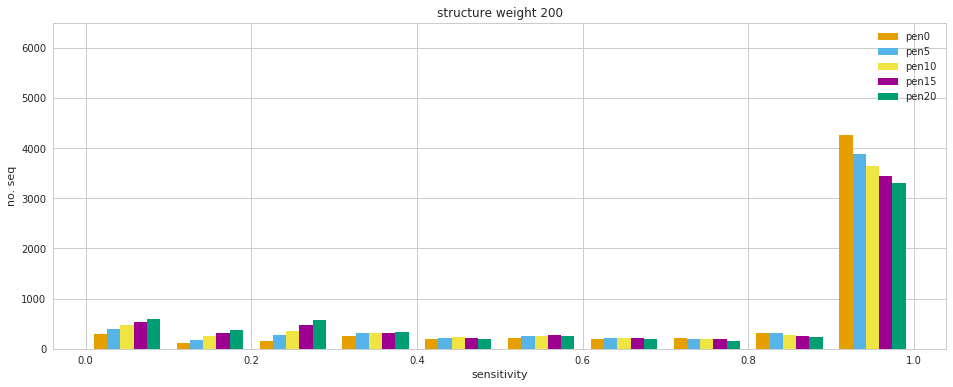

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
#fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(16,6))
fig, ax = plt.subplots( figsize=(16,6))

#box = dict(facecolor='yellow', pad=5, alpha=0.2)

x1 = pd.Series(df_sw200_pen0['sens'], name="pen0")
x2 = pd.Series(df_sw200_pen5['sens'], name="pen5")
x3 = pd.Series(df_sw200_pen10['sens'], name="pen10")
x4 = pd.Series(df_sw200_pen15['sens'], name="pen15")
x5 = pd.Series(df_sw200_pen20['sens'], name="pen20")

#y1 = pd.Series(df_sw200_pen0['spec'], name="pen0")
#y2 = pd.Series(df_sw200_pen5['spec'], name="pen5")
#y3 = pd.Series(df_sw200_pen10['spec'], name="pen10")
#y4 = pd.Series(df_sw200_pen15['spec'], name="pen15")
#y5 = pd.Series(df_sw200_pen20['spec'], name="pen20")



# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#9e0090' , '#009E73']
names = ['pen0', 'pen5', 'pen10', 'pen15' ,'pen20']


         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
#plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True, color = colors, label=names)
plt.hist([x1, x2, x3, x4, x5], color = colors, label=names)
#ax = sns.distplot([y1, y2, y3, y4], ax=ax2)


ax.set_ylim([0,6500])


# Plot formatting
plt.legend()
plt.xlabel('sensitivity')
plt.ylabel('no. seq')
plt.title('structure weight 200')
fig.savefig(plot_dir + 'barplot_sensitivity_penalties_sw200def_locarnaV2_0RC6_local_full_local_bralibase_con100.pdf', format='pdf')

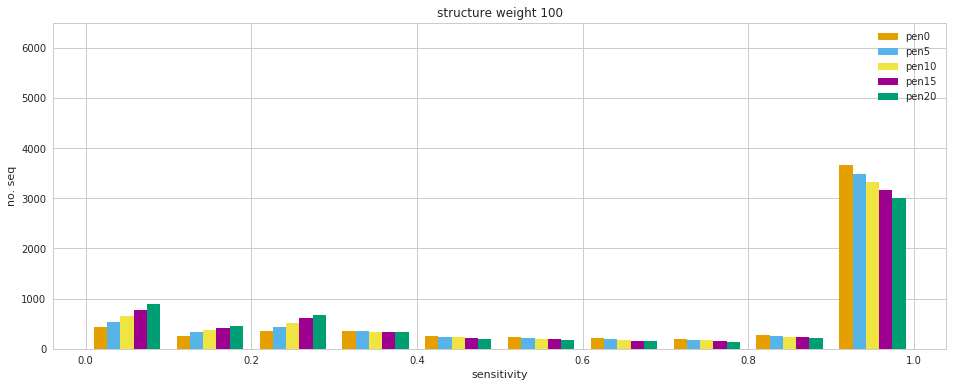

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
#fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(16,6))
fig, ax = plt.subplots( figsize=(16,6))

#box = dict(facecolor='yellow', pad=5, alpha=0.2)

x1 = pd.Series(df_sw100_pen0['sens'], name="pen0")
x2 = pd.Series(df_sw100_pen5['sens'], name="pen5")
x3 = pd.Series(df_sw100_pen10['sens'], name="pen10")
x4 = pd.Series(df_sw100_pen15['sens'], name="pen15")
x5 = pd.Series(df_sw100_pen20['sens'], name="pen20")



colors = ['#E69F00', '#56B4E9', '#F0E442', '#9e0090' , '#009E73']
names = ['pen0', 'pen5', 'pen10', 'pen15' ,'pen20']


         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
#plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True, color = colors, label=names)
plt.hist([x1, x2, x3, x4, x5], color = colors, label=names)

#ax = sns.distplot([y1, y2, y3, y4], ax=ax2)

ax.set_ylim([0,6500])



# Plot formatting
plt.legend()
plt.xlabel('sensitivity')
plt.ylabel('no. seq')
plt.title('structure weight 100')

fig.savefig(plot_dir + 'barplot_sensitivity_penalties_sw100def_locarnaV2_0RC6_local_full_local_bralibase_con100.pdf', format='pdf')

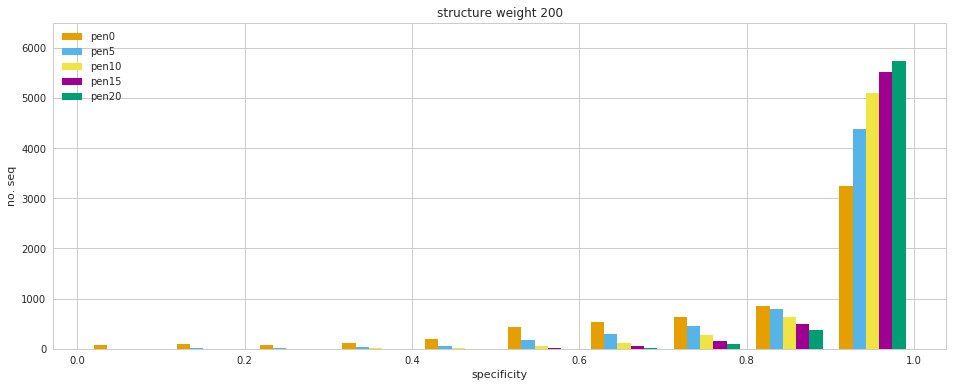

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
#fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(16,6))
fig, ax = plt.subplots( figsize=(16,6))

#box = dict(facecolor='yellow', pad=5, alpha=0.2)

x1 = pd.Series(df_sw200_pen0['spec'], name="pen0")
x2 = pd.Series(df_sw200_pen5['spec'], name="pen5")
x3 = pd.Series(df_sw200_pen10['spec'], name="pen10")
x4 = pd.Series(df_sw200_pen15['spec'], name="pen15")
x5 = pd.Series(df_sw200_pen20['spec'], name="pen20")




colors = ['#E69F00', '#56B4E9', '#F0E442', '#9e0090' , '#009E73']
names = ['pen0', 'pen5', 'pen10', 'pen15' ,'pen20']


         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
#plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True, color = colors, label=names)
plt.hist([x1, x2, x3, x4, x5], color = colors, label=names)
#ax = sns.distplot([y1, y2, y3, y4], ax=ax2)


ax.set_ylim([0,6500])


# Plot formatting
plt.legend()
plt.xlabel('specificity')
plt.ylabel('no. seq')
plt.title('structure weight 200')
fig.savefig(plot_dir + 'barplot_specificity_penalties_sw200def_locarnaV2_0RC6_local_full_local_bralibase_con100.pdf', format='pdf')

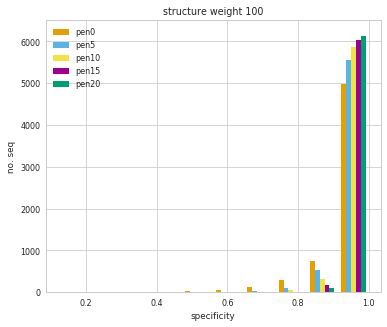

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")

fig, ax = plt.subplots( figsize=(6,5))
#fig, ax = plt.subplots()


#box = dict(facecolor='yellow', pad=5, alpha=0.2)

x1 = pd.Series(df_sw100_pen0['spec'], name="pen0")
x2 = pd.Series(df_sw100_pen5['spec'], name="pen5")
x3 = pd.Series(df_sw100_pen10['spec'], name="pen10")
x4 = pd.Series(df_sw100_pen15['spec'], name="pen15")
x5 = pd.Series(df_sw100_pen20['spec'], name="pen20")



colors = ['#E69F00', '#56B4E9', '#F0E442', '#9e0090' , '#009E73']
names = ['pen0', 'pen5', 'pen10', 'pen15' ,'pen20']


         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
#plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True, color = colors, label=names)
plt.hist([x1, x2, x3, x4, x5], color = colors, label=names)
#ax = sns.distplot([y1, y2, y3, y4], ax=ax2)
ax.set_ylim([0,6500])



# Plot formatting
plt.legend()
plt.xlabel('specificity')
plt.ylabel('no. seq')
plt.title('structure weight 100')
fig.savefig(plot_dir + 'barplot_specificity_penalties_sw100def_locarnaV2_0RC6_local_full_local_bralibase_con100.pdf', format='pdf')

In [30]:
df_pen_range_sw100_sw200

,Filename,pen_range,score,PredlocalStartA,PredlocalEndA,PredlocalStartB,PredlocalEndB,spsmax,sps,sens,spec,geo_mean,mean,sci,F1,seq,alig_length
0,/scratch/bi01/miladim/Teresa/Bralibase-LocalAl...,0,6918,99,152,99,152,0.962963,1.000000,1.000000,0.9900,0.994987,0.995000,99,0.981132,sw100,54.0
1,/scratch/bi01/miladim/Teresa/Bralibase-LocalAl...,0,17089,102,252,102,251,0.006494,0.006494,0.980456,1.0000,0.990180,0.990228,91,0.990131,sw100,150.5
2,/scratch/bi01/miladim/Teresa/Bralibase-LocalAl...,0,4862,100,164,100,164,0.892308,0.892308,1.000000,0.9950,0.997494,0.997500,97,0.992188,sw100,65.0
3,/scratch/bi01/miladim/Teresa/Bralibase-LocalAl...,0,3264,111,168,110,167,0.742857,0.742857,0.846760,1.0000,0.920190,0.923380,125,0.917010,sw100,58.0
4,/scratch/bi01/miladim/Teresa/Bralibase-LocalAl...,0,1657,102,117,149,164,0.000000,0.000000,0.000000,0.9200,0.000000,0.460000,108,0.000000,sw100,16.0
5,/scratch/bi01/miladim/Teresa/Bralibase-LocalAl...,0,24488,100,352,99,352,0.062992,0.062992,1.000000,0.9925,0.996242,0.996250,88,0.997034,sw100,253.5
6,/scratch/bi01/miladim/Teresa/Bralibase-LocalAl...,0,1514,13,48,39,74,0.000000,0.000000,0.000000,0.8200,0.000000,0.410000,130,0.000000,sw100,36.0
7,/scratch/bi01/miladim/Teresa/Bralibase-LocalAl...,0,3138,107,162,107,163,0.763889,0.763889,0.790200,1.0000,0.888931,0.895100,136,0.882805,sw100,56.5
8,/scratch/bi01/miladim/Teresa/Bralibase-LocalAl...,0,8456,101,214,101,214,0.991228,0.991228,0.991228,0.9950,0.993112,0.993114,67,0.991228,sw100,114.0
9,/scratch/bi01/miladim/Teresa/Bralibase-LocalAl...,0,5379,99,153,99,153,0.945455,1.000000,1.000000,0.9850,0.992472,0.992500,92,0.971963,sw100,55.0


In [31]:
print 'full dataset'
print len(df_pen_range_sw100_sw200)
print df_pen_range_sw100_sw200.replace([np.inf, -np.inf], np.nan).isnull().values.sum()
df_pen_range_sw100_sw200_filterd_F1 = df_pen_range_sw100_sw200[df_pen_range_sw100_sw200.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
print len(df_pen_range_sw100_sw200_filterd_F1)


print 'dataset SI<70'
print len(df_pen_range_sw100_sw200_SI70)
print df_pen_range_sw100_sw200_SI70.replace([np.inf, -np.inf], np.nan).isnull().values.sum()
df_pen_range_sw100_sw200_filterd_F1_SI70 = df_pen_range_sw100_sw200_SI70[df_pen_range_sw100_sw200_SI70.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
print len(df_pen_range_sw100_sw200_filterd_F1_SI70)


full dataset
62260
0
62260
dataset SI<70
30190
0
30190


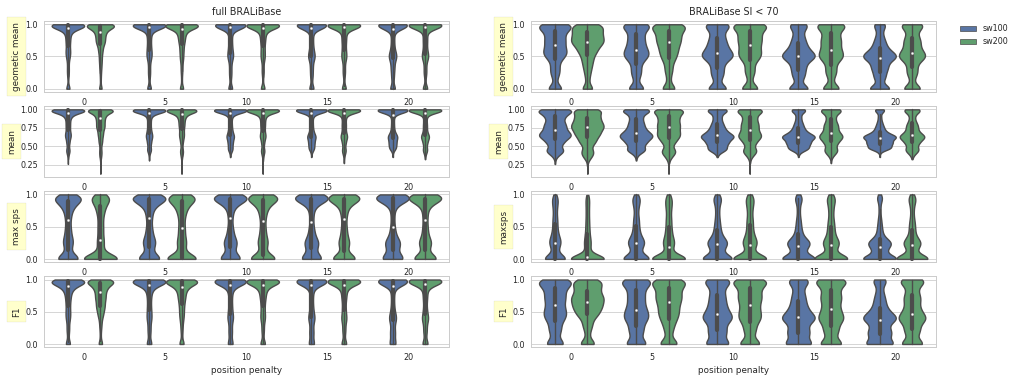

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16,6))
box = dict(facecolor='yellow', pad=5, alpha=0.2)

sns.violinplot(x="pen_range", y="geo_mean", hue="seq", data=df_pen_range_sw100_sw200, ax=ax1,cut=0, legend=False)
ax1.set_ylabel('geometic mean', bbox=box)
ax1.set_title('full BRALiBase')
ax1.legend_.remove()
ax1.set_xlabel('')

sns.violinplot(x="pen_range", y="geo_mean", hue="seq", data=df_pen_range_sw100_sw200_SI70, ax=ax2,cut=0, legend=False)
ax2.set_ylabel('geometic mean', bbox=box)
ax2.set_title('BRALiBase SI < 70')
#ax2.legend_.remove()
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_xlabel('')



sns.violinplot(x="pen_range", y="mean", hue="seq", data=df_pen_range_sw100_sw200, ax=ax3,cut=0, legend=False)
ax3.set_ylabel('mean', bbox=box)
ax3.legend_.remove()
ax3.set_xlabel('')



sns.violinplot(x="pen_range", y="mean", hue="seq", data=df_pen_range_sw100_sw200_SI70, ax=ax4,cut=0, legend=False)
ax4.set_ylabel('mean', bbox=box)
ax4.legend_.remove()
ax4.set_xlabel('')

sns.violinplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw200, ax=ax5,cut=0, legend=False)
ax5.set_ylabel('max sps', bbox=box)
ax5.legend_.remove()
ax5.set_xlabel('')



sns.violinplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw200_SI70, ax=ax6,cut=0, legend=False)
ax6.set_ylabel('maxsps', bbox=box)
ax6.legend_.remove()
ax6.set_xlabel('')


sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw100_sw200_filterd_F1, ax=ax7,cut=0, legend=False)
ax7.set_ylabel('F1', bbox=box)
ax7.legend_.remove()
ax7.set_xlabel('position penalty')

sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw100_sw200_filterd_F1_SI70, ax=ax8,cut=0, legend=False)
ax8.set_ylabel('F1', bbox=box)
ax8.legend_.remove()
ax8.set_xlabel('position penalty')

fig.savefig(plot_dir + 'violinplot6_gmean_mean_maxsps_penalties_sw100def_sw200def_locarnaV2_0RC6_local_full_local_plus_filterd_APSI70_bralibase_con100.pdf', format='pdf')

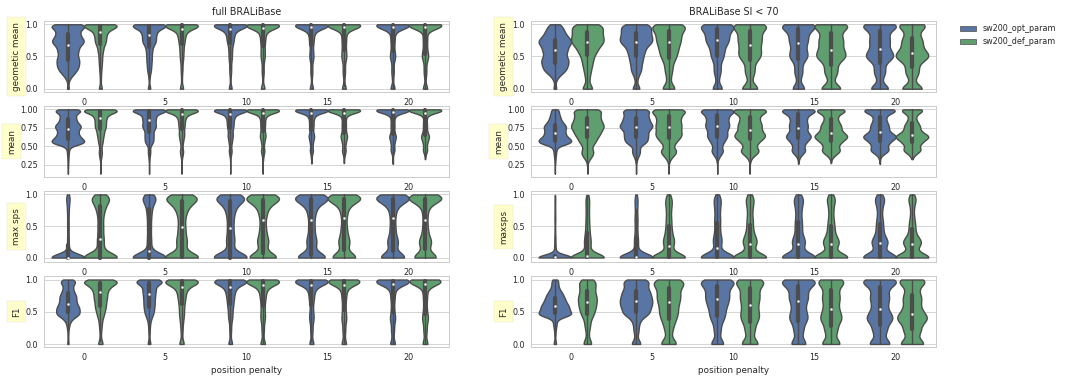

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16,6))
box = dict(facecolor='yellow', pad=5, alpha=0.2)

sns.violinplot(x="pen_range", y="geo_mean", hue="seq", data=df_pen_range_sw200_def_sw200_opt, ax=ax1,cut=0,scale='count', legend=False)
ax1.set_ylabel('geometic mean', bbox=box)
ax1.set_title('full BRALiBase')
ax1.legend_.remove()
ax1.set_xlabel('')

sns.violinplot(x="pen_range", y="geo_mean", hue="seq", data=df_pen_range_sw200_def_sw200_opt_SI70, ax=ax2,cut=0,scale='count', legend=False)
ax2.set_ylabel('geometic mean', bbox=box)
ax2.set_title('BRALiBase SI < 70')
#ax2.legend_.remove()
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_xlabel('')


sns.violinplot(x="pen_range", y="mean", hue="seq", data=df_pen_range_sw200_def_sw200_opt, ax=ax3,cut=0, scale='count',legend=False)
ax3.set_ylabel('mean', bbox=box)
ax3.legend_.remove()
ax3.set_xlabel('')



sns.violinplot(x="pen_range", y="mean", hue="seq", data=df_pen_range_sw200_def_sw200_opt_SI70, ax=ax4,cut=0,scale='count', legend=False)
ax4.set_ylabel('mean', bbox=box)
ax4.legend_.remove()
ax4.set_xlabel('')



sns.violinplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw200_def_sw200_opt, ax=ax5,cut=0, scale='count',legend=False)
ax5.set_ylabel('max sps', bbox=box)
ax5.legend_.remove()
ax5.set_xlabel('position penalty')



sns.violinplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw200_def_sw200_opt_SI70, ax=ax6,cut=0, scale='count', legend=False)
ax6.set_ylabel('maxsps', bbox=box)
ax6.legend_.remove()
ax6.set_xlabel('position penalty')


sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw200_def_sw200_opt, ax=ax7,cut=0, legend=False)
ax7.set_ylabel('F1', bbox=box)
ax7.legend_.remove()
ax7.set_xlabel('position penalty')

sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw200_def_sw200_opt_SI70, ax=ax8,cut=0, legend=False)
ax8.set_ylabel('F1', bbox=box)
ax8.legend_.remove()
ax8.set_xlabel('position penalty')


fig.savefig(plot_dir + 'violinplot6_gmean_mean_maxsps_penalties_sw200def_sw200opt_locarnaV2_0RC6_local_full_local_plus_filterd_APSI70_bralibase_con100.pdf', format='pdf')

/home/muellert/miniconda3/envs/ploting/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


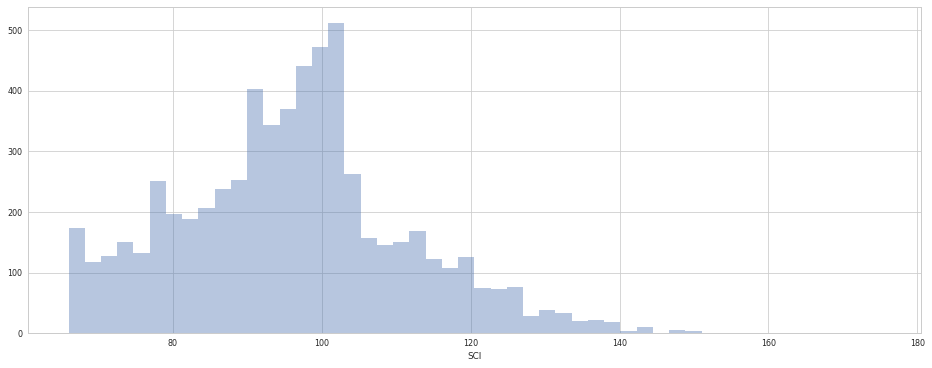

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig, ax = plt.subplots( figsize=(16,6))

x = pd.Series(df_sw200_pen0['sci'], name="SCI")
ax = sns.distplot(x, kde=False)
#ax1.set_ylabel('penalty 0', bbox=box)

/home/muellert/miniconda3/envs/ploting/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


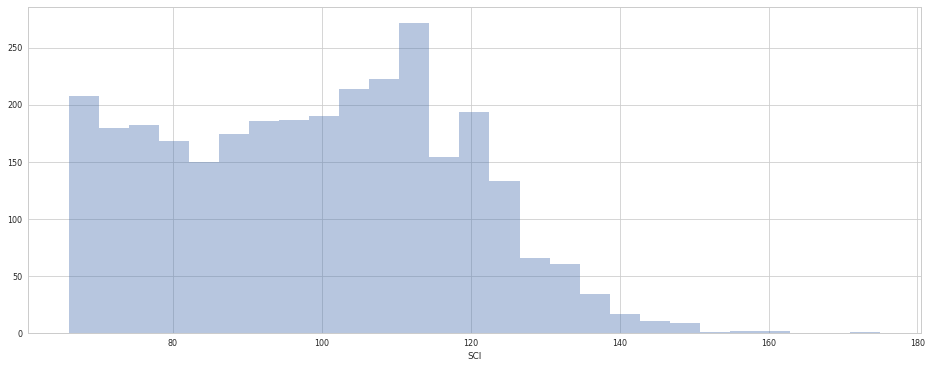

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig, ax = plt.subplots( figsize=(16,6))

x = pd.Series(df_sw200_pen0[df_sw200_pen0.apsi < 70]['sci'], name="SCI")
ax = sns.distplot(x, kde=False)
#ax1.set_ylabel('penalty 0', bbox=box)

In [36]:
#df_high_apsi_low_sci = df_sw200_pen0[((df_sw200_pen0.apsi < 70) & (df_sw200_pen0.sci > 100))]
#df_pen_range_sw100_sw200_sci_higher100_apsi70 = df_pen_range_sw100_sw200_sci_higher100[df_pen_range_sw100_sw200_sci_higher100.apsi < 70]

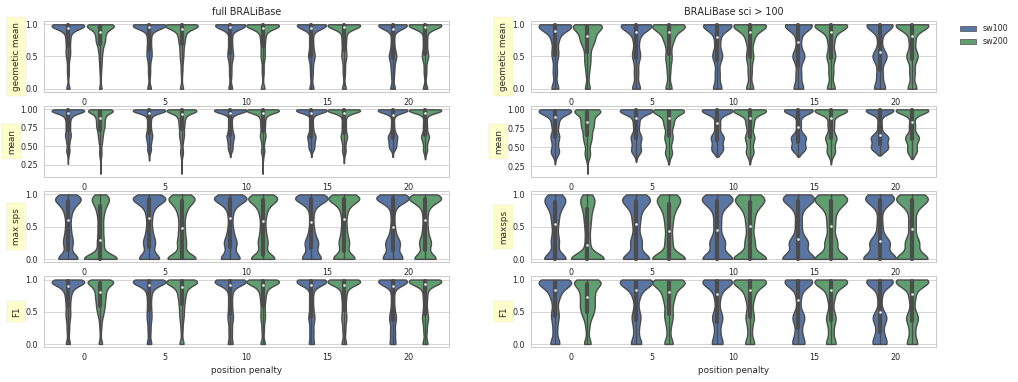

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16,6))
box = dict(facecolor='yellow', pad=5, alpha=0.2)

sns.violinplot(x="pen_range", y="geo_mean", hue="seq", data=df_pen_range_sw100_sw200, ax=ax1,cut=0, legend=False)
ax1.set_ylabel('geometic mean', bbox=box)
ax1.set_title('full BRALiBase')
ax1.legend_.remove()
ax1.set_xlabel('')

sns.violinplot(x="pen_range", y="geo_mean", hue="seq", data=df_pen_range_sw100_sw200_sci_higher100, ax=ax2,cut=0, legend=False)
ax2.set_ylabel('geometic mean', bbox=box)
ax2.set_title('BRALiBase sci > 100')
#ax2.legend_.remove()
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_xlabel('')


sns.violinplot(x="pen_range", y="mean", hue="seq", data=df_pen_range_sw100_sw200, ax=ax3,cut=0, legend=False)
ax3.set_ylabel('mean', bbox=box)
ax3.legend_.remove()
ax3.set_xlabel('')



sns.violinplot(x="pen_range", y="mean", hue="seq", data=df_pen_range_sw100_sw200_sci_higher100, ax=ax4,cut=0, legend=False)
ax4.set_ylabel('mean', bbox=box)
ax4.legend_.remove()
ax4.set_xlabel('')



sns.violinplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw200, ax=ax5,cut=0, legend=False)
ax5.set_ylabel('max sps', bbox=box)
ax5.legend_.remove()
ax5.set_xlabel('position penalty')



sns.violinplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw200_sci_higher100, ax=ax6,cut=0, legend=False)
ax6.set_ylabel('maxsps', bbox=box)
ax6.legend_.remove()
ax6.set_xlabel('position penalty')

sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw100_sw200, ax=ax7,cut=0, legend=False)
ax7.set_ylabel('F1', bbox=box)
ax7.legend_.remove()
ax7.set_xlabel('position penalty')

sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw100_sw200_sci_higher100, ax=ax8,cut=0, legend=False)
ax8.set_ylabel('F1', bbox=box)
ax8.legend_.remove()
ax8.set_xlabel('position penalty')


fig.savefig(plot_dir + 'violinplot6_gmean_mean_maxsps_penalties_sw100def_sw200def_locarnaV2_0RC6_local_full_local_plus_filterd_SCI100_bralibase_con100.pdf', format='pdf')

Text(0.5,0,'position penalty')

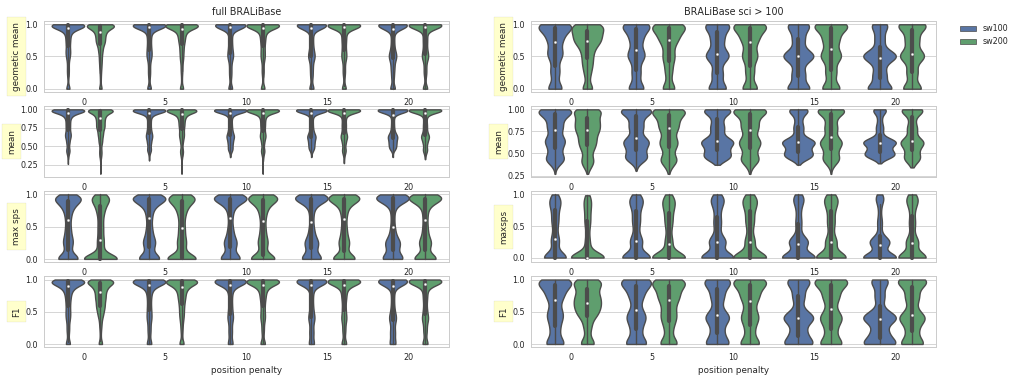

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16,6))
box = dict(facecolor='yellow', pad=5, alpha=0.2)

sns.violinplot(x="pen_range", y="geo_mean", hue="seq", data=df_pen_range_sw100_sw200, ax=ax1,cut=0, legend=False)
ax1.set_ylabel('geometic mean', bbox=box)
ax1.set_title('full BRALiBase')
ax1.legend_.remove()
ax1.set_xlabel('')

sns.violinplot(x="pen_range", y="geo_mean", hue="seq", data=df_pen_range_sw100_sw200_SI70_SCI100, ax=ax2,cut=0, legend=False)
ax2.set_ylabel('geometic mean', bbox=box)
ax2.set_title('BRALiBase sci > 100')
#ax2.legend_.remove()
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_xlabel('')


sns.violinplot(x="pen_range", y="mean", hue="seq", data=df_pen_range_sw100_sw200, ax=ax3,cut=0, legend=False)
ax3.set_ylabel('mean', bbox=box)
ax3.legend_.remove()
ax3.set_xlabel('')



sns.violinplot(x="pen_range", y="mean", hue="seq", data=df_pen_range_sw100_sw200_SI70_SCI100, ax=ax4,cut=0, legend=False)
ax4.set_ylabel('mean', bbox=box)
ax4.legend_.remove()
ax4.set_xlabel('')



sns.violinplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw200, ax=ax5,cut=0, legend=False)
ax5.set_ylabel('max sps', bbox=box)
ax5.legend_.remove()
ax5.set_xlabel('position penalty')



sns.violinplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw200_SI70_SCI100, ax=ax6,cut=0, legend=False)
ax6.set_ylabel('maxsps', bbox=box)
ax6.legend_.remove()
ax6.set_xlabel('position penalty')

sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw100_sw200, ax=ax7,cut=0, legend=False)
ax7.set_ylabel('F1', bbox=box)
ax7.legend_.remove()
ax7.set_xlabel('position penalty')

sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw100_sw200_SI70_SCI100, ax=ax8,cut=0, legend=False)
ax8.set_ylabel('F1', bbox=box)
ax8.legend_.remove()
ax8.set_xlabel('position penalty')



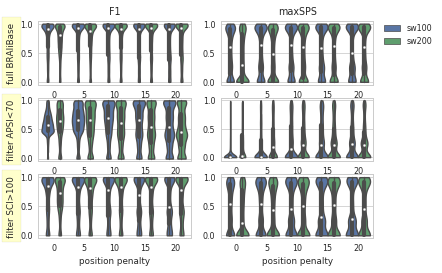

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2) #, figsize=(16,6)
box = dict(facecolor='yellow', pad=5, alpha=0.2)
sns.set_context("paper")


sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw100_sw200, ax=ax1,cut=0, legend=False)
ax1.set_ylabel('full BRAliBase', bbox=box, rotation=90)
ax1.set_title('F1')
ax1.legend_.remove()
ax1.set_xlabel('position penalty')

sns.violinplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw200, ax=ax2,cut=0, legend=False)
#ax2.set_ylabel('max sps', bbox=box)
ax2.set_xlabel('position penalty')
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_title('maxSPS')
ax2.set_ylabel('')




sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw200_def_sw200_opt_SI70, ax=ax3,cut=0, legend=False)
ax3.set_ylabel('filter APSI<70', bbox=box, rotation=90)
ax3.legend_.remove()
ax3.set_xlabel('position penalty')

sns.violinplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw200_def_sw200_opt_SI70, ax=ax4,cut=0, legend=False)
#ax4.set_ylabel('max sps', bbox=box)
ax4.legend_.remove()
ax4.set_xlabel('position penalty')
ax4.set_ylabel('')



sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw100_sw200_sci_higher100, ax=ax5,cut=0, legend=False)
ax5.set_ylabel('filter SCI>100', bbox=box, rotation=90)
ax5.legend_.remove()
ax5.set_xlabel('position penalty')

sns.violinplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw200_sci_higher100, ax=ax6,cut=0, legend=False)
ax6.set_ylabel('')
ax6.legend_.remove()
ax6.set_xlabel('position penalty')



#sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw100_sw200_SI70_SCI100, ax=ax7,cut=0, legend=False)
#ax7.set_ylabel('filter APSI<70 & SCI>100', bbox=box, rotation=85)
#ax7.legend_.remove()
#ax7.set_xlabel('position penalty')


#sns.violinplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw200_SI70_SCI100, ax=ax8,cut=0, legend=False)
##ax8.set_ylabel('max sps', bbox=box)
#ax8.legend_.remove()
#ax8.set_ylabel('')
#ax8.set_xlabel('position penalty')


fig.savefig(plot_dir + 'violinplot6_f1_maxsps_penalties_sw200def_sw100def_locarnaV2_0RC6_local_full_local_plus_filterd_APSI70_SCI100_bralibase_con100.pdf', format='pdf')
fig.savefig(plot_dir + 'violinplot6_f1_maxsps_penalties_sw200def_sw100def_locarnaV2_0RC6_local_full_local_plus_filterd_APSI70_SCI100_bralibase_con100.svg', format='svg')

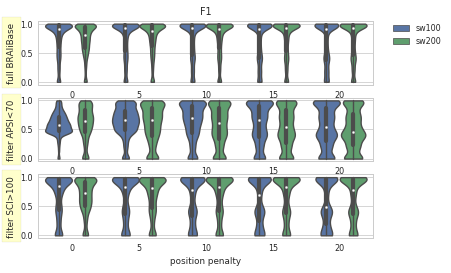

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig, ((ax1), (ax3), (ax5)) = plt.subplots(3, 1) #, figsize=(16,6)
box = dict(facecolor='yellow', pad=5, alpha=0.2)
sns.set_context("paper")


sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw100_sw200, ax=ax1,cut=0, legend=False)
ax1.set_ylabel('full BRAliBase', bbox=box, rotation=90)
ax1.set_title('F1')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.set_xlabel('position penalty')

#sns.violinplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw200, ax=ax2,cut=0, legend=False)
#ax2.set_ylabel('max sps', bbox=box)
#ax2.set_xlabel('position penalty')
#ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#ax2.set_title('maxSPS')
#ax2.set_ylabel('')




sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw200_def_sw200_opt_SI70, ax=ax3,cut=0, legend=False)
ax3.set_ylabel('filter APSI<70', bbox=box, rotation=90)
ax3.legend_.remove()
ax3.set_xlabel('position penalty')

#sns.violinplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw200_def_sw200_opt_SI70, ax=ax4,cut=0, legend=False)
#ax4.set_ylabel('max sps', bbox=box)
#ax4.legend_.remove()
#ax4.set_xlabel('position penalty')
#ax4.set_ylabel('')



sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw100_sw200_sci_higher100, ax=ax5,cut=0, legend=False)
ax5.set_ylabel('filter SCI>100', bbox=box, rotation=90)
ax5.legend_.remove()
ax5.set_xlabel('position penalty')

#sns.violinplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw200_sci_higher100, ax=ax6,cut=0, legend=False)
#ax6.set_ylabel('')
#ax6.legend_.remove()
#ax6.set_xlabel('position penalty')



#sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw100_sw200_SI70_SCI100, ax=ax7,cut=0, legend=False)
#ax7.set_ylabel('filter APSI<70 & SCI>100', bbox=box, rotation=85)
#ax7.legend_.remove()
#ax7.set_xlabel('position penalty')


#sns.violinplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw200_SI70_SCI100, ax=ax8,cut=0, legend=False)
##ax8.set_ylabel('max sps', bbox=box)
#ax8.legend_.remove()
#ax8.set_ylabel('')
#ax8.set_xlabel('position penalty')


fig.savefig(plot_dir + 'violinplot3_f1_penalties_sw200def_sw100def_locarnaV2_0RC6_local_full_local_plus_filterd_APSI70_SCI100_bralibase_con100.pdf', format='pdf', bbox_inches='tight')
fig.savefig(plot_dir + 'violinplot3_f1_penalties_sw200def_sw100def_locarnaV2_0RC6_local_full_local_plus_filterd_APSI70_SCI100_bralibase_con100.svg', format='svg', bbox_inches='tight')


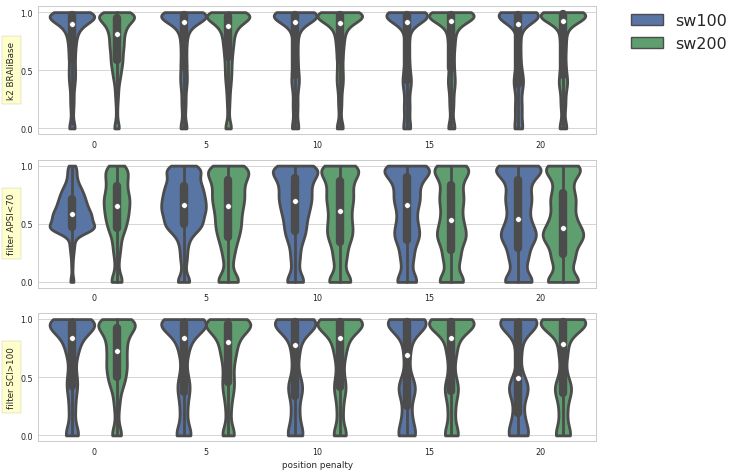

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig, ((ax1), (ax3), (ax5)) = plt.subplots(3, 1, figsize=(10,8)) #, figsize=(16,6)
box = dict(facecolor='yellow', pad=5, alpha=0.2)
sns.set_context("poster")


sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw100_sw200, ax=ax1,cut=0, legend=False)
ax1.set_ylabel('k2 BRAliBase', bbox=box, rotation=90)
#ax1.set_title('F1')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.set_xlabel('')

#sns.violinplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw200, ax=ax2,cut=0, legend=False)
#ax2.set_ylabel('max sps', bbox=box)
#ax2.set_xlabel('position penalty')
#ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#ax2.set_title('maxSPS')
#ax2.set_ylabel('')




sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw200_def_sw200_opt_SI70, ax=ax3,cut=0, legend=False)
ax3.set_ylabel('filter APSI<70', bbox=box, rotation=90)
ax3.legend_.remove()
ax3.set_xlabel('')

#sns.violinplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw200_def_sw200_opt_SI70, ax=ax4,cut=0, legend=False)
#ax4.set_ylabel('max sps', bbox=box)
#ax4.legend_.remove()
#ax4.set_xlabel('position penalty')
#ax4.set_ylabel('')



sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw100_sw200_sci_higher100, ax=ax5,cut=0, legend=False)
ax5.set_ylabel('filter SCI>100', bbox=box, rotation=90)
ax5.legend_.remove()
ax5.set_xlabel('position penalty')


fig.savefig(plot_dir + 'poster_violinplot3_f1_penalties_sw200def_sw100def_locarnaV2_0RC6_local_full_local_plus_filterd_APSI70_SCI100_bralibase_con100.pdf', format='pdf', bbox_inches='tight')
fig.savefig(plot_dir + 'poster_violinplot3_f1_penalties_sw200def_sw100def_locarnaV2_0RC6_local_full_local_plus_filterd_APSI70_SCI100_bralibase_con100.svg', format='svg', bbox_inches='tight')


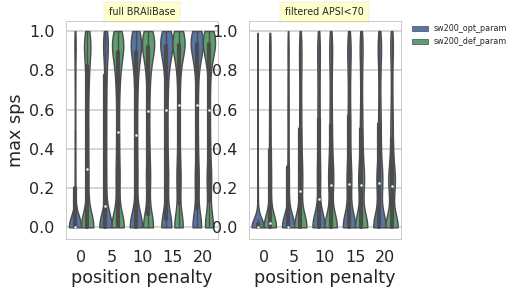

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2) #, figsize=(16,6)
box = dict(facecolor='yellow', pad=5, alpha=0.2)
sns.set_context("paper")

sns.violinplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw200_def_sw200_opt, ax=ax1,cut=0, scale='count',legend=False)
ax1.set_ylabel('max sps')
ax1.set_title('full BRAliBase', bbox=box)
ax1.legend_.remove()
ax1.set_xlabel('position penalty')



sns.violinplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw200_def_sw200_opt_SI70, ax=ax2,cut=0, scale='count', legend=False)
ax2.set_ylabel('')
ax2.legend_.remove()
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_xlabel('position penalty')
ax2.set_title('filtered APSI<70', bbox=box)



#sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw200_def_sw200_opt, ax=ax3,cut=0, legend=False)
#ax3.set_ylabel('F1')
#ax3.legend_.remove()
#ax3.set_xlabel('position penalty')

#sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw200_def_sw200_opt_SI70, ax=ax4,cut=0, legend=False)
#ax4.set_ylabel('')
#ax4.legend_.remove()
#ax4.set_xlabel('position penalty')


fig.savefig(plot_dir + 'violinplot4_f1_maxsps_penalties_sw200def_sw200opt_locarnaV2_0RC6_local_full_local_plus_filterd_APSI70_bralibase_con100.pdf', format='pdf', bbox_inches='tight')
fig.savefig(plot_dir + 'violinplot4_f1_maxsps_penalties_sw200def_sw200opt_locarnaV2_0RC6_local_full_local_plus_filterd_APSI70_bralibase_con100.svg', format='svg', bbox_inches='tight')

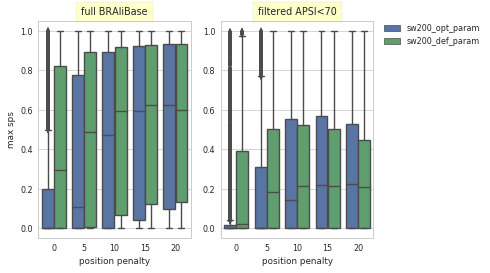

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2) #, figsize=(16,6)
box = dict(facecolor='yellow', pad=5, alpha=0.2)
sns.set_context("paper")

sns.boxplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw200_def_sw200_opt, ax=ax1)
ax1.set_ylabel('max sps')
ax1.set_title('full BRAliBase', bbox=box)
ax1.legend_.remove()
ax1.set_xlabel('position penalty')



sns.boxplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw200_def_sw200_opt_SI70, ax=ax2)
ax2.set_ylabel('')
ax2.legend_.remove()
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_xlabel('position penalty')
ax2.set_title('filtered APSI<70', bbox=box)



#sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw200_def_sw200_opt, ax=ax3,cut=0, legend=False)
#ax3.set_ylabel('F1')
#ax3.legend_.remove()
#ax3.set_xlabel('position penalty')

#sns.violinplot(x="pen_range", y="F1", hue="seq", data=df_pen_range_sw200_def_sw200_opt_SI70, ax=ax4,cut=0, legend=False)
#ax4.set_ylabel('')
#ax4.legend_.remove()
#ax4.set_xlabel('position penalty')


fig.savefig(plot_dir + 'boxplot2_maxsps_penalties_sw200def_sw200opt_locarnaV2_0RC6_local_full_local_plus_filterd_APSI70_bralibase_con100.pdf', format='pdf', bbox_inches='tight')
fig.savefig(plot_dir + 'boxplot2_maxsps_penalties_sw200def_sw200opt_locarnaV2_0RC6_local_full_local_plus_filterd_APSI70_bralibase_con100.svg', format='svg', bbox_inches='tight')

In [44]:
def get_categorized(df, start=0, stop=600, steps=100):
    df_copy = df.copy()
    df_categorized = categorize_colum(df_copy, min_val=start, maxval=stop, step_size=steps)
    return df_categorized

In [45]:
def categorize_colum(df, min_val, maxval, step_size):
    bin_length= maxval/step_size
    bins = []
    bin_names = []
    bin_val_start = min_val
    bin_val_end = min_val + step_size
    # put error handeling for incorrect bining!!!!
    for i in xrange(0,bin_length,1):
        bin_name = str(bin_val_start) + '-' + str(bin_val_end) 
        bins.append(bin_val_end)
        bin_names.append(bin_name)
        bin_val_start = bin_val_end
        bin_val_end = bin_val_end + step_size
    bins.append(np.inf)
    df['in_length_category'] = pd.cut(df.avg_in_seq_length, bins, labels = bin_names)

    print bin_length
    return df

In [46]:
df_categorized = get_categorized(df_local_full_pen_scores_sw200, start=0, stop=600, steps=100)
df_categorized_SI70 = get_categorized(df_local_full_pen_scores_sw200_SI70, start=0, stop=600, steps=100)


6
6


Text(0,0.5,'normalized alignment length')

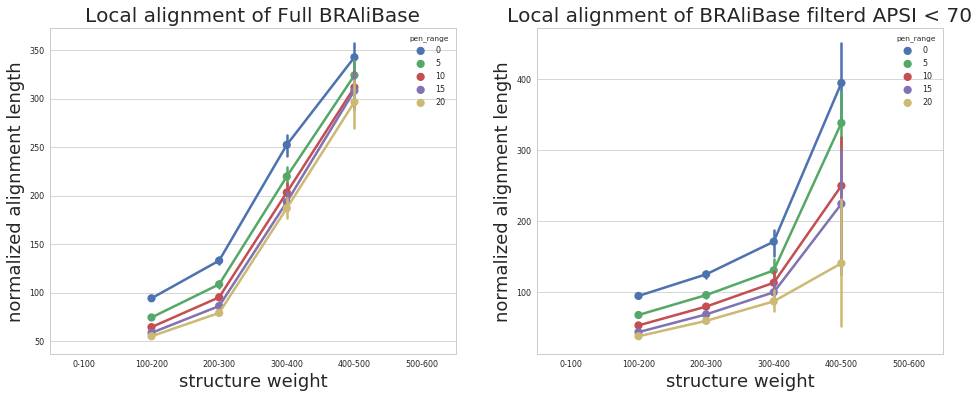

In [47]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

sns.pointplot(x="in_length_category", y="avg_alig_length", hue='pen_range', data=df_categorized, ax=ax1, alpha =1)

ax1.set_title('Local alignment of Full BRAliBase', fontsize=20)
ax1.set_xlabel('structure weight', fontsize=18)
ax1.set_ylabel('normalized alignment length', fontsize=18)
ax1.set_ylabel('normalized alignment length', fontsize=18)
#ax1.set_ylim([0,200])

sns.pointplot(x="in_length_category", y="avg_alig_length", hue='pen_range', data=df_categorized_SI70, ax=ax2, alpha =1)




ax2.set_title('Local alignment of BRAliBase filterd APSI < 70', fontsize=20)
ax2.set_xlabel('structure weight', fontsize=18)
ax2.set_ylabel('normalized alignment length', fontsize=18)
#ax2.set_ylim([0,200])

#fig.savefig(line_plot_dir + 'lineplot_normalizedAlignLength_vs_SW_LocARNAV2.0RC6_local_two_plots_localBralibase_con100.pdf', format='pdf')


In [48]:
# geo_mean filtern

df_pen_range_sw100_sw200_filterd = df_pen_range_sw100_sw200[(df_pen_range_sw100_sw200.seq == 'sw100') & (df_pen_range_sw100_sw200.pen_range == 0)|(df_pen_range_sw100_sw200.seq == 'sw200') & (df_pen_range_sw100_sw200.pen_range == 10)]
df_pen_range_sw100_sw200_filterd_sw100_pen0 = df_pen_range_sw100_sw200[(df_pen_range_sw100_sw200.seq == 'sw100') & (df_pen_range_sw100_sw200.pen_range == 0)]
df_pen_range_sw100_sw200_filterd_sw200_pen10 = df_pen_range_sw100_sw200[(df_pen_range_sw100_sw200.seq == 'sw200') & (df_pen_range_sw100_sw200.pen_range == 10)]

In [49]:
df_pen_range_sw100_sw200_filterd.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12452 entries, 0 to 6225
Data columns (total 17 columns):
Filename           12452 non-null object
pen_range          12452 non-null int64
score              12452 non-null int64
PredlocalStartA    12452 non-null int64
PredlocalEndA      12452 non-null int64
PredlocalStartB    12452 non-null int64
PredlocalEndB      12452 non-null int64
spsmax             12452 non-null float64
sps                12452 non-null float64
sens               12452 non-null float64
spec               12452 non-null float64
geo_mean           12452 non-null float64
mean               12452 non-null float64
sci                12452 non-null int64
F1                 12452 non-null float64
seq                12452 non-null object
alig_length        12452 non-null float64
dtypes: float64(8), int64(7), object(2)
memory usage: 1.7+ MB


In [50]:
result = pd.merge(df_pen_range_sw100_sw200_filterd_sw100_pen0, df_pen_range_sw100_sw200_filterd_sw200_pen10, how='inner', on='Filename')

In [51]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6226 entries, 0 to 6225
Data columns (total 33 columns):
Filename             6226 non-null object
pen_range_x          6226 non-null int64
score_x              6226 non-null int64
PredlocalStartA_x    6226 non-null int64
PredlocalEndA_x      6226 non-null int64
PredlocalStartB_x    6226 non-null int64
PredlocalEndB_x      6226 non-null int64
spsmax_x             6226 non-null float64
sps_x                6226 non-null float64
sens_x               6226 non-null float64
spec_x               6226 non-null float64
geo_mean_x           6226 non-null float64
mean_x               6226 non-null float64
sci_x                6226 non-null int64
F1_x                 6226 non-null float64
seq_x                6226 non-null object
alig_length_x        6226 non-null float64
pen_range_y          6226 non-null int64
score_y              6226 non-null int64
PredlocalStartA_y    6226 non-null int64
PredlocalEndA_y      6226 non-null int64
PredlocalStart

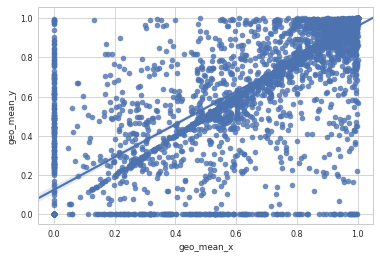

In [52]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, ax = plt.subplots()

ax = sns.regplot(x="geo_mean_x", y="geo_mean_y", data=result)

In [53]:
########## penatlty 0 - 30 #########################################

In [54]:
# verion 2.RC6
plot_dir = '/home/muellert/Dokumente/locarna_parameteropt/plots/20180822_local_aling_penalty_comparision/'
file_dir = '/home/muellert/Dokumente/locarna_parameteropt/Data/20180905_local_pen0_30_bralibase_con100/'
infile_local_full_pen_sw100_pen30 = file_dir + '20180905_localcon100_pen_0_30_sw100.log'
infile_local_full_pen_sw200_pen30 = file_dir + '20180905_localcon100_pen_0_30_sw200.log'

#infile_local_full_opt_parmam_sw200 = '/home/muellert/Dokumente/locarna_parameteropt/Data/20180820_optimized_param_local/20180810_local_Bralibase_pen_optimized_param_sw200.log'


In [55]:
# define dataset

cut_apsi_value = 100;

if cut_apsi_value < 100:
    plot_title = 'local BraliBase filterd APSI < ' + str(cut_apsi_value)
elif cut_apsi_value == 100:
    plot_title = 'Full local BraliBase' 
else:
    print 'error: apsi sould be between 20 to 100'

In [56]:
# full
df_local_full_pen_scores_sw100_pen30, df_local_avg_scorssw100_pen30 = generate_dataset(infile_local_full_pen_sw100_pen30, step_size = 5, start_param = 0, end_param = 30, cut_apsi=cut_apsi_value)
df_local_full_pen_scores_sw200_pen30, df_local_avg_scorssw200_pen30 = generate_dataset(infile_local_full_pen_sw200_pen30, step_size = 5, start_param = 0, end_param = 30, cut_apsi=cut_apsi_value)
#df_local_full_pen_scores_sw200_opt, df_local_avg_scorssw200_opt = generate_dataset(infile_local_full_opt_parmam_sw200, cut_apsi=cut_apsi_value)


# APSI < 70
df_local_full_pen_scores_sw100_SI70_pen30, df_local_avg_scorssw100_SI70_pen30 = generate_dataset(infile_local_full_pen_sw100_pen30, step_size = 5, start_param = 0, end_param = 30, cut_apsi=70)
df_local_full_pen_scores_sw200_SI70_pen30, df_local_avg_scorssw200_SI70_pen30 = generate_dataset(infile_local_full_pen_sw200_pen30, step_size = 5, start_param = 0, end_param = 30, cut_apsi=70)
#df_local_full_pen_scores_sw200_opt_SI70, df_local_avg_scorssw200_opt_SI70 = generate_dataset(infile_local_full_opt_parmam_sw200, cut_apsi=70)


< 70
< 70


In [57]:
# add df together
## connect sw100 and sw200 
# full 
df_pen_range_sw100_sw200_pen30 = generate_one_df(df_local_full_pen_scores_sw200_pen30, df_local_full_pen_scores_sw100_pen30, id_all_shuffeld='sw100', id_con_shuffle='sw200')

# APSI < 70
df_pen_range_sw100_sw200_SI70_pen30 = generate_one_df(df_local_full_pen_scores_sw200_SI70_pen30, df_local_full_pen_scores_sw100_SI70_pen30, id_all_shuffeld='sw100', id_con_shuffle='sw200')



In [58]:
# calculate alignemnt lenth

#df_shuffled_and_unshuffled['ReflocalStartB']
df_pen_range_sw100_sw200_pen30['alig_length'] = ((df_pen_range_sw100_sw200_pen30['PredlocalEndA'] - df_pen_range_sw100_sw200_pen30['PredlocalStartA']+1) + (df_pen_range_sw100_sw200_pen30['PredlocalEndB'] - df_pen_range_sw100_sw200_pen30['PredlocalStartB']+1)) / 2
df_pen_range_sw100_sw200_SI70_pen30['alig_length'] = ((df_pen_range_sw100_sw200_SI70_pen30['PredlocalEndA'] - df_pen_range_sw100_sw200_SI70_pen30['PredlocalStartA']+1) + (df_pen_range_sw100_sw200_SI70_pen30['PredlocalEndB'] - df_pen_range_sw100_sw200_SI70_pen30['PredlocalStartB']+1)) / 2


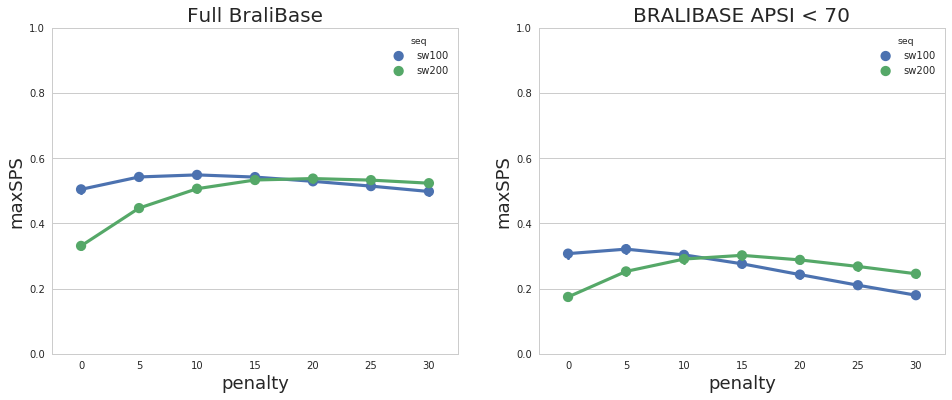

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
#sns.set_context("paper")
#fig = plt.figure(figsize=(6,5))
#ax = fig.gca()# define axis
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

sns.pointplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw200_pen30, ax=ax1, alpha =1)

ax1.set_title('Full BraliBase', fontsize=20)
ax1.set_xlabel('penalty', fontsize=18)
ax1.set_ylabel('maxSPS', fontsize=18)
ax1.set_ylim([0,1])

sns.pointplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw200_SI70_pen30, ax=ax2, alpha =1)

ax2.set_title('BRALIBASE APSI < 70', fontsize=20)
#ax.set_title('Full BraliBase', fontsize=20)
ax2.set_xlabel('penalty', fontsize=18)
ax2.set_ylabel('maxSPS', fontsize=18)
ax2.set_ylim([0,1])

plot_dir_fist_plot = '/home/muellert/Dokumente/locarna_parameteropt/plots/20180906_alignment_score_random_seq/'
fig.savefig(plot_dir_fist_plot + 'lineplot_local_maxSPS_vs_penalty_locarnaV2_0RC6_Bralibase.pdf', format='pdf', bbox_inches='tight',)


In [60]:
##### Optimized DATA


In [61]:
# verion 2.RC6
plot_dir_optPram = '/home/muellert/Dokumente/locarna_parameteropt/plots/20181026_optParam_pen30/'
file_dir = '/home/muellert/Dokumente/locarna_parameteropt/Data/20181025_globOptParam_localLocarna_localBralibaseCon100/'
infile_local_full_pen_sw100_optPrarm = file_dir + '20181026_globalOptParam_SW100_localLocarna_localBralibaseCon100.log'
infile_local_full_pen_sw200_optPrarm = file_dir + '20181026_globalOptParam_SW200_localLocarna_localBralibaseCon100.log'
infile_local_full_pen_sw210_optPrarm = file_dir +'20181025_globalOptParam_SW210_localLocarna_localBralibaseCon100.log'



In [62]:
df_local_pen0_30_sw100_optPrarm, df_local_avg_pen0_30_sw100_optPrarm = generate_dataset(infile_local_full_pen_sw100_optPrarm, step_size = 5, start_param = 0, end_param = 30, cut_apsi=100)
df_local_pen0_30_sw200_optPrarm, df_local_avg_pen0_30_sw200_optPrarm = generate_dataset(infile_local_full_pen_sw200_optPrarm, step_size = 5, start_param = 0, end_param = 30, cut_apsi=100)
df_local_pen0_30_sw210_optPrarm, df_local_avg_pen0_30_sw210_optPrarm = generate_dataset(infile_local_full_pen_sw210_optPrarm, step_size = 5, start_param = 0, end_param = 30, cut_apsi=100)



# APSI < 70
df_local_pen0_30_sw100_optPrarm_SI70, df_local_avg_pen0_30_sw100_optPrarm_SI70 = generate_dataset(infile_local_full_pen_sw100_optPrarm, step_size = 5, start_param = 0, end_param = 30, cut_apsi=70)
df_local_pen0_30_sw200_optPrarm_SI70, df_local_avg_pen0_30_sw200_optPrarm_SI70 = generate_dataset(infile_local_full_pen_sw200_optPrarm, step_size = 5, start_param = 0, end_param = 30, cut_apsi=70)
df_local_pen0_30_sw210_optPrarm_SI70, df_local_avg_pen0_30_sw210_optPrarm_SI70 = generate_dataset(infile_local_full_pen_sw210_optPrarm, step_size = 5, start_param = 0, end_param = 30, cut_apsi=70)


< 70
< 70
< 70


In [63]:
'$\omega$'

'$\\omega$'

In [64]:
df_pen_range_sw100_sw200optPrarm = generate_one_df(df_local_pen0_30_sw200_optPrarm, df_local_pen0_30_sw100_optPrarm, id_all_shuffeld='100', id_con_shuffle='200')
df_pen_range_sw100_sw210optPrarm = generate_one_df(df_local_pen0_30_sw210_optPrarm, df_local_pen0_30_sw100_optPrarm, id_all_shuffeld='100', id_con_shuffle='210')
df_pen_range_sw100defParam_sw200optPrarm = generate_one_df(df_local_pen0_30_sw200_optPrarm, df_local_full_pen_scores_sw100_pen30, id_all_shuffeld='sw100_def', id_con_shuffle='sw200_opt')



df_pen_range_sw100_sw200optPrarm_SI70 = generate_one_df(df_local_pen0_30_sw200_optPrarm_SI70, df_local_pen0_30_sw100_optPrarm_SI70, id_all_shuffeld='100', id_con_shuffle='200')
df_pen_range_sw100_sw210optPrarm_SI70 = generate_one_df(df_local_pen0_30_sw210_optPrarm_SI70, df_local_pen0_30_sw100_optPrarm_SI70, id_all_shuffeld='100', id_con_shuffle='210')
df_pen_range_sw100defParam_sw200optPrarm_SI70 = generate_one_df(df_local_pen0_30_sw200_optPrarm_SI70, df_local_full_pen_scores_sw100_SI70_pen30, id_all_shuffeld='sw100_def', id_con_shuffle='sw200_opt')


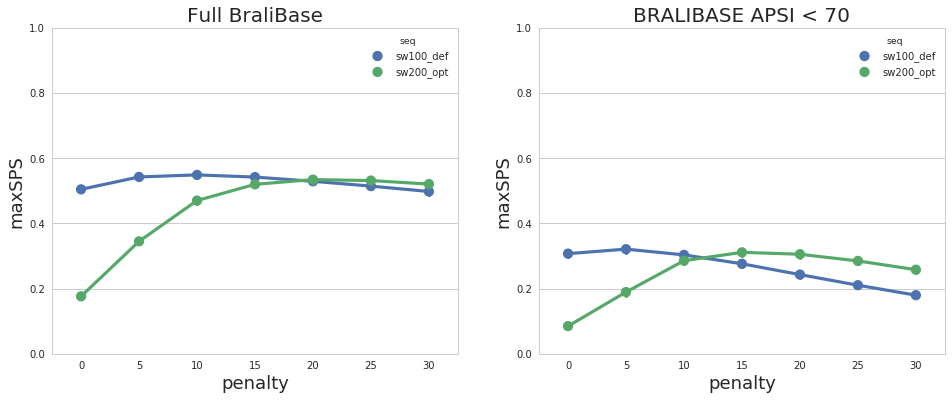

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
#sns.set_context("paper")
#fig = plt.figure(figsize=(6,5))
#ax = fig.gca()# define axis
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

sns.pointplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100defParam_sw200optPrarm, ax=ax1, alpha =1)

ax1.set_title('Full BraliBase', fontsize=20)
ax1.set_xlabel('penalty', fontsize=18)
ax1.set_ylabel('maxSPS', fontsize=18)
ax1.set_ylim([0,1])

sns.pointplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100defParam_sw200optPrarm_SI70, ax=ax2, alpha =1)

ax2.set_title('BRALIBASE APSI < 70', fontsize=20)
#ax.set_title('Full BraliBase', fontsize=20)
ax2.set_xlabel('penalty', fontsize=18)
ax2.set_ylabel('maxSPS', fontsize=18)
ax2.set_ylim([0,1])

fig.savefig(plot_dir_optPram + 'lineplot_local_maxSPS_vs_penalty_locarnaV2_0RC6_Bralibase_pen30_defParamSW100_optParamSW200.pdf', format='pdf', bbox_inches='tight',)

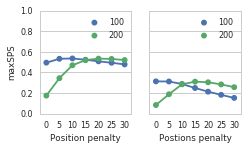

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="whitegrid")
#sns.set_context("paper")
sns.set(style="whitegrid", font='sans-serif', font_scale=0.8)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}                  
sns.set_context(rc = paper_rc)
col_dims = (3.6, 1.9) # one
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(col_dims))


sns.pointplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw200optPrarm, ax=ax1)
# estimator=np.median,
#ax1.set_title('Full BraliBase', fontsize=20)
ax1.set_xlabel('Position penalty')
ax1.set_ylabel('maxSPS')
ax1.set_ylim([0,1])
l1 = ax1.legend()
l1.set_title('')

sns.pointplot(x="pen_range", y="spsmax", hue="seq",  data=df_pen_range_sw100_sw200optPrarm_SI70, ax=ax2)

#ax2.set_title('BRALIBASE APSI < 70', fontsize=20)
#ax.set_title('Full BraliBase', fontsize=20)
ax2.set_xlabel('Postions penalty')
ax2.set_ylabel('')
ax2.set_ylim([0,1])
l2 = ax2.legend()
l2.set_title('')
for tick in ax2.get_yticklabels():
    tick.set(visible=False)

fig.savefig(plot_dir_optPram + 'lineplot_local_maxSPS_vs_penalty_locarnaV2_0RC6_Bralibase_pen30_optParam_SW100_SW200.pdf', format='pdf', bbox_inches='tight')
fig.savefig(plot_dir_paper + 'lineplot_local_maxSPS_vs_penalty_locarnaV2_0RC6_Bralibase_pen30_optParam_SW100_SW200.pdf', format='pdf', bbox_inches='tight')

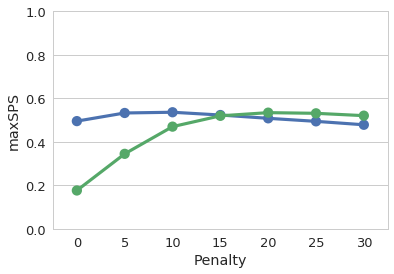

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper")
sns.set(style="whitegrid", font='sans-serif', font_scale=1.3)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 20}                  
#sns.set_context(rc = paper_rc)
#col_dims = (3.6, 2.9) # one
fig, (ax1) = plt.subplots(1,1)


sns.pointplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw200optPrarm, ax=ax1)

#ax1.set_title('Full BraliBase', fontsize=20)
ax1.set_xlabel('Penalty')
ax1.set_ylabel('maxSPS')
ax1.set_ylim([0,1])
l1 = ax1.legend()
l1.set_title('')
ax1.legend_.remove()


fig.savefig('/home/muellert/Dokumente/locarna_parameteropt/plots/20190130_plots_for_beld_talk/lineplot_maxSPS.png', format='png', dpi=300, bbox_inches='tight')


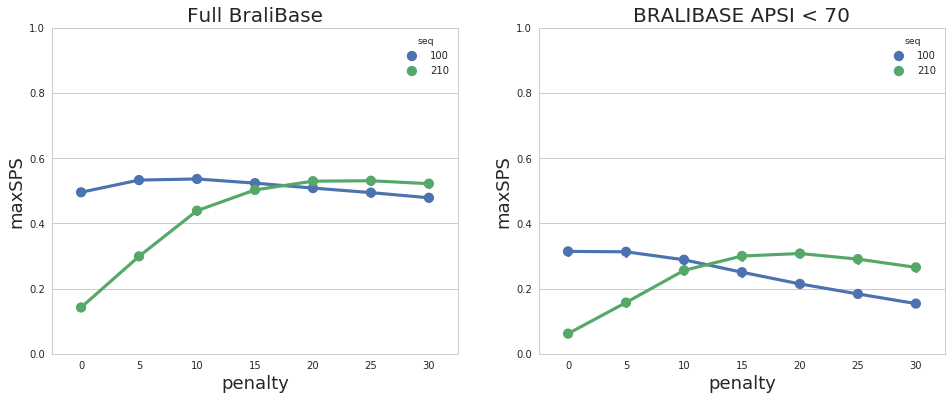

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
#sns.set_context("paper")
#fig = plt.figure(figsize=(6,5))
#ax = fig.gca()# define axis
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

sns.pointplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw210optPrarm, ax=ax1, alpha =1)

ax1.set_title('Full BraliBase', fontsize=20)
ax1.set_xlabel('penalty', fontsize=18)
ax1.set_ylabel('maxSPS', fontsize=18)
ax1.set_ylim([0,1])

sns.pointplot(x="pen_range", y="spsmax", hue="seq", data=df_pen_range_sw100_sw210optPrarm_SI70, ax=ax2, alpha =1)

ax2.set_title('BRALIBASE APSI < 70', fontsize=20)
#ax.set_title('Full BraliBase', fontsize=20)
ax2.set_xlabel('penalty', fontsize=18)
ax2.set_ylabel('maxSPS', fontsize=18)
ax2.set_ylim([0,1])

fig.savefig(plot_dir_optPram + 'lineplot_local_maxSPS_vs_penalty_locarnaV2_0RC6_Bralibase_pen30_optParam_SW100_SW210.pdf', format='pdf', bbox_inches='tight',)


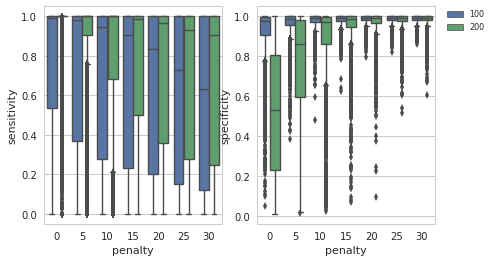

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#, figsize=(8,4)
sns.set_style("whitegrid")
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(7,4))
sns.set_context("paper")



sns.boxplot(x="pen_range", y="sens", hue="seq", data=df_pen_range_sw100_sw200optPrarm, ax=ax1)
#ax1.set_title(plot_title, fontsize=18)
ax1.set_xlabel('penalty')
ax1.set_ylabel('sensitivity')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.legend_.remove()


sns.boxplot(x="pen_range", y="spec", hue="seq", data=df_pen_range_sw100_sw200optPrarm, ax=ax2)
#ax2.set_title(plot_title, fontsize=18)
ax2.set_xlabel('penalty')
ax2.set_ylabel('specificity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.savefig(plot_dir_optPram + 'boxplot_sens_spec_penalties_locarnaV2_0RC6_optParam_two_plots_full_local_bralibase_con100_pen30_SW100_SW200.pdf', format='pdf', bbox_inches='tight')
fig.savefig(plot_dir_paper + 'boxplot_sens_spec_penalties_locarnaV2_0RC6_optParam_two_plots_full_local_bralibase_con100_pen30_SW100_SW200.pdf', format='pdf', bbox_inches='tight')

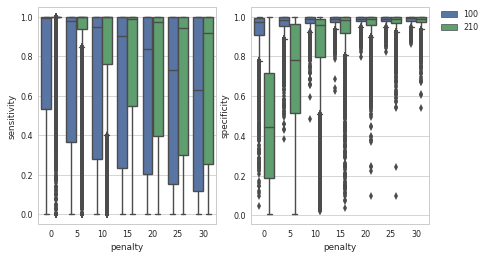

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(7,4))
sns.set_context("paper")



sns.boxplot(x="pen_range", y="sens", hue="seq", data=df_pen_range_sw100_sw210optPrarm, ax=ax1)
#ax1.set_title(plot_title, fontsize=18)
ax1.set_xlabel('penalty')
ax1.set_ylabel('sensitivity')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.legend_.remove()


sns.boxplot(x="pen_range", y="spec", hue="seq", data=df_pen_range_sw100_sw210optPrarm, ax=ax2)
#ax2.set_title(plot_title, fontsize=18)
ax2.set_xlabel('penalty')
ax2.set_ylabel('specificity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.savefig(plot_dir_optPram + 'boxplot_sens_spec_penalties_locarnaV2_0RC6_optParam_two_plots_full_local_bralibase_con100_pen30_SW100_SW210.pdf', format='pdf', bbox_inches='tight')

In [71]:
df_local_pen0_30_sw200_optPrarm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43582 entries, 0 to 6225
Data columns (total 49 columns):
Filename                 43582 non-null object
PredlocalEndA            43582 non-null int64
PredlocalEndB            43582 non-null int64
PredlocalStartA          43582 non-null int64
PredlocalStartB          43582 non-null int64
Predscore                43582 non-null object
ReflocalEndA             43582 non-null int64
ReflocalEndB             43582 non-null int64
ReflocalStartA           43582 non-null int64
ReflocalStartB           43582 non-null int64
RefsequenceLengthRawA    43582 non-null int64
RefsequenceLengthRawB    43582 non-null int64
RefsequenceLengthRefA    43582 non-null int64
RefsequenceLengthRefB    43582 non-null int64
SeqAFn                   43582 non-null float64
SeqAFp                   43582 non-null float64
SeqATn                   43582 non-null float64
SeqATp                   43582 non-null float64
SeqBFn                   43582 non-null float64
SeqBFp

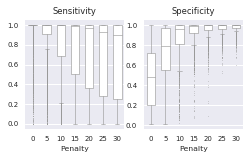

In [72]:
df_local_pen0_30_sw200_optPrarm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font='sans-serif', font_scale=0.7)
col_dims = (3.9, 2.0) # one
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(col_dims))



sns.boxplot(x="pen_range", y="sens", data=df_local_pen0_30_sw200_optPrarm, ax=ax1, color='white', width=0.6, linewidth=0.6, fliersize=0.6)
#ax1.set_title(plot_title, fontsize=18)
ax1.set_xlabel('Penalty')
ax1.set_ylabel('')
ax1.set_title('Sensitivity')

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


sns.boxplot(x="pen_range", y="spec", data=df_local_pen0_30_sw200_optPrarm_SI70, ax=ax2, color='white', width=0.6, linewidth=0.6, fliersize=0.6)
#ax2.set_title(plot_title, fontsize=18)
ax2.set_xlabel('Penalty')
ax2.set_ylabel('')
ax2.set_title('Specificity')

#for tick in ax2.get_yticklabels(): 
    #tick.set(visible=False)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.savefig(plot_dir_paper + 'boxplot_sens_spec_penalties_locarnaV2_0RC6_optParam_two_plots_full_local_bralibase_con100_pen30_SW200.pdf', format='pdf', bbox_inches='tight')

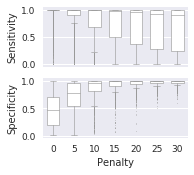

In [73]:
df_local_pen0_30_sw200_optPrarm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font='sans-serif', font_scale=0.9)
col_dims = (2.6, 2.4) 
fig, ((ax1),(ax2)) = plt.subplots(2,1, figsize=(col_dims))



sns.boxplot(x="pen_range", y="sens", data=df_local_pen0_30_sw200_optPrarm, ax=ax1, color='white', width=0.6, linewidth=0.6, fliersize=0.6)
#ax1.set_title(plot_title, fontsize=18)
ax1.set_xlabel('')
ax1.set_ylabel('Sensitivity')
ax1.set_title('')
for tick in ax1.get_xticklabels(): 
    tick.set(visible=False)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


sns.boxplot(x="pen_range", y="spec", data=df_local_pen0_30_sw200_optPrarm_SI70, ax=ax2, color='white', width=0.6, linewidth=0.6, fliersize=0.6)
#ax2.set_title(plot_title, fontsize=18)
ax2.set_xlabel('Penalty')
ax2.set_ylabel('Specificity')
ax2.set_title('')

#for tick in ax2.get_yticklabels(): 
    #tick.set(visible=False)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.savefig('/home/muellert/Dokumente/locarna_parameteropt/plots/20190130_plots_for_beld_talk/boxplot_sensitivity_specificity_presetation_pen.pdf', format='pdf', dpi=300, bbox_inches='tight')
fig.savefig('/home/muellert/Dokumente/locarna_parameteropt/plots/20190130_plots_for_beld_talk/boxplot_sensitivity_specificity_presentation_pen.png', format='png', dpi=300, bbox_inches='tight')
#fig.savefig(plot_dir_paper + 'boxplot_sens_spec_penalties_locarnaV2_0RC6_optParam_two_plots_full_local_bralibase_con100_pen30_SW200.pdf', format='pdf', bbox_inches='tight')

In [74]:
# Compare Sw200 and penalty 0 with global optimized pen15
df_local_full_pen_scores_sw200_pen0_defParam = df_local_full_pen_scores_sw200_pen30[(df_local_full_pen_scores_sw200_pen30.pen_range == 0)]

df_local_pen15_sw200_optPrarm = df_local_pen0_30_sw200_optPrarm[(df_local_pen0_30_sw200_optPrarm.pen_range == 15)]


df_compind_defSW200Pen0_optSW200Pen15 = generate_one_df(df_local_pen15_sw200_optPrarm, df_local_full_pen_scores_sw200_pen0_defParam, id_all_shuffeld='Default parameters', id_con_shuffle='Optimized parameters')


#frames = [df_local_full_pen_scores_sw200_pen0_defParam, df_local_pen15_sw200_optPrarm]
#df_compind_defSW200Pen0_optSW200Pen15 = pd.concat(frames)

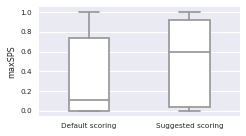

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font='sans-serif', font_scale=0.73)
col_dims = (3.6, 2.0) # one
fig, ax = plt.subplots(figsize=col_dims)
#sns.set_context("paper")

#figsize=(8,4)width=0.5

sns.boxplot(x="seq", y="spsmax", data=df_compind_defSW200Pen0_optSW200Pen15,  ax=ax, width=0.4, color='white')
#ax1.set_title(plot_title, fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('maxSPS')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(['Default scoring', 'Suggested scoring'])


fig.savefig(plot_dir_optPram + 'boxplot_compare_defParam_SW200_and_optParam_SW200_pen15.pdf', format='pdf', bbox_inches='tight')
fig.savefig(plot_dir_paper + 'boxplot_compare_defParam_SW200_and_optParam_SW200_pen15.pdf', format='pdf', bbox_inches='tight')

In [76]:
save_dir = "/home/muellert/Dokumente/locarna_parameteropt/Data/20181221_globla_optimized_param_with_global_locarna"

df_local_pen15_sw200_optPrarm.to_csv(save_dir + '/df_local_pen15_sw200_optPrarm', sep='\t')
df_local_full_pen_scores_sw200_pen0_defParam.to_csv(save_dir + '/df_local_sw200_pen0_defParam', sep='\t')


#df_local_pen15_sw200_optPrarm, df_local_full_pen_scores_sw200_pen0_defParam

In [77]:
# Compare Sw200 and penalty 0 with global optimized pen15
df_local_full_pen_scores_sw200_pen0_defParam = df_local_full_pen_scores_sw200_pen30[(df_local_full_pen_scores_sw200_pen30.pen_range == 0)]

df_local_pen15_sw210_optPrarm = df_local_pen0_30_sw210_optPrarm[(df_local_pen0_30_sw210_optPrarm.pen_range == 15)]


df_compind_defSW200Pen0_optSW210Pen15 = generate_one_df(df_local_pen15_sw210_optPrarm, df_local_full_pen_scores_sw200_pen0_defParam, id_all_shuffeld='default_parameters', id_con_shuffle='optimized_parameters_pen15')

df_compind_optSW200Pen15_optSW210Pen15 = generate_one_df(df_local_pen15_sw210_optPrarm, df_local_pen15_sw200_optPrarm, id_all_shuffeld='optimized_parameters_pen15_SW200', id_con_shuffle='optimized_parameters_pen15_SW210')

#frames = [df_local_full_pen_scores_sw200_pen0_defParam, df_local_pen15_sw200_optPrarm]
#df_compind_defSW200Pen0_optSW200Pen15 = pd.concat(frames)


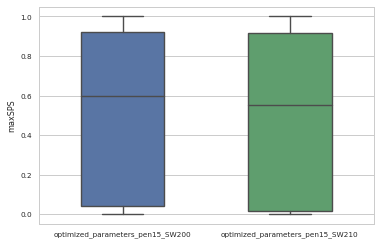

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, ax = plt.subplots()
sns.set_context("paper")



sns.boxplot(x="seq", y="spsmax", data=df_compind_optSW200Pen15_optSW210Pen15, ax=ax, width=0.5)
#ax1.set_title(plot_title, fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('maxSPS')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



fig.savefig(plot_dir_optPram + 'boxplot_compare_optParam_SW210_and_optParam_SW200_pen15.pdf', format='pdf', bbox_inches='tight')

In [79]:
df_local_full_pen_scores_sw200_pen0_defParam["spsmax"].mean()

0.33083211620463204

In [80]:
df_local_pen15_sw200_optPrarm["spsmax"].mean()

0.51957268282496949

In [81]:
df_local_full_pen_scores_sw200_pen0_defParam["spsmax"].median()

0.10973957549300001

In [82]:
df_local_pen15_sw200_optPrarm["spsmax"].median()

0.59563349204505855